# Week 3 - Linear Models and Efficient Computation with Kernels

## 🎯 Learning goals

1. Understand how kernel methods enable efficient computation for problems with more features than samples

2. Apply precomputed kernels using sklearn to solve a practical problem: perform brain decoding using functional Magnetic Images (fMRI) data

3. Understand the relationship between to the primal and dual formulations in kernel methods

4. Learn how to work with functional Magnetic Ressonance Imaging (fMRI) data. For information about fMRI check: https://en.wikipedia.org/wiki/Functional_magnetic_resonance_imaging

### Most common use case of Kernels
Kernels can help machine learning models learn nonlinear decision boundaries by mapping input data into a higher dimensional feature space. This allows algorithms like support vector machines (SVMs) to find nonlinear boundaries in the input space to classify data. However, using kernels can be also a computational efficient way to train kernel models (e.g. SVMs) when the number of features is higher than the sample size.

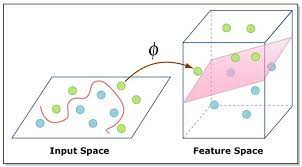

## 📍 Haxby fMRI dataset

- The Haxby study investigated face and object representation in human ventral temporal cortex
- The study consisted of 6 subjects passively viewing greyscale images of eight object categories (eg houses, cats, faces), grouped in 24s blocks separated by rest periods
- The study showed the images for 500ms and was followed by a 1500ms inter-stimulus interval, whilst taking a full-brain fMRI.
- The goal is to see whether you can decode what kind of image the person was looking at from patterns of brain activity in the visual cortex.
- More information can be found in the original study: Haxby, J., Gobbini, M., Furey, M., Ishai, A., Schouten, J., and Pietrini, P. (2001). Distributed and overlapping representations of faces and objects in ventral temporal cortex. Science 293, 2425–2430: https://www.science.org/doi/10.1126/science.1063736

### Downloading dataset

We will use `nilearn` a python wrapper around `scikit-learn` that provides useful visualisation and statistical, ML tools for brain volume analysis.

The `nilearn.datasets.fetch_haxby` function will download the Haxby dataset if not present on the disk, in the nilearn data directory. It can take a while to download about 310 MB of data from the Internet.

In [3]:
%pip install scikit-learn==1.7.2 matplotlib==3.10.8 pandas==2.3.3 seaborn==0.13.2 nilearn==0.13.0

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.9 MB 3.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.9 MB 3.1 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.9 MB 3.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/8.9 MB 2.8 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/8.9 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.9 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.9 MB 2.2 MB/s eta 0:00:03
   ----------------- ---------------------- 3.9/8.9 MB 2.2 MB/s eta 0:00:03
   -------------------- ------------------- 4.5/8.9 MB 2.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.9 MB 2.2 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.9 MB 2.2 MB/s eta 0:00:02
   -----------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from nilearn import datasets

# Fetch Haxby dataset with stimuli
# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby(fetch_stimuli=True)

# 'func' is a list of filenames: one for each subject
fmri_filename = haxby_dataset.func[0]

# print basic information on the dataset
print(f"First subject functional nifti images (4D) are at: {fmri_filename}")


[fetch_haxby] Added README.md to C:\Users\adria\nilearn_data

[fetch_haxby] Dataset created in C:\Users\adria\nilearn_data\haxby2001

[fetch_haxby] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_haxby]  ...done. (0 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[fetch_haxby] Downloaded 1835008 of 291168628 bytes (0.6%%,  2.7min remaining)

[fetch_haxby] Downloaded 5505024 of 291168628 bytes (1.9%%,  1.8min remaining)

[fetch_haxby] Downloaded 6979584 of 291168628 bytes (2.4%%,  2.1min remaining)

[fetch_haxby] Downloaded 7962624 of 291168628 bytes (2.7%%,  2.5min remaining)

[fetch_haxby] Downloaded 8781824 of 291168628 bytes (3.0%%,  2.8min remaining)

[fetch_haxby] Downloaded 9592832 of 291168628 bytes (3.3%%,  3.1min remaining)

[fetch_haxby] Downloaded 10280960 of 291168628 bytes (3.5%%,  3.3min remaining)

[fetch_haxby] Downloaded 10878976 of 291168628 bytes (3.7%%,  3.6min remaining)

[fetch_haxby] Downloaded 11288576 of 291168628 bytes (3.9%%,  3.9min remaining)

[fetch_haxby] Downloaded 11788288 of 291168628 bytes (4.0%%,  4.1min remaining)

[fetch_haxby] Downloaded 12271616 of 291168628 bytes (4.2%%,  4.3min remaining)

[fetch_haxby] Downloaded 12574720 of 291168628 bytes (4.3%%,  4.6min remaining)

[fetch_haxby] Downloaded 12787712 of 291168628 bytes (4.4%%,  4.9min remaining)

[fetch_haxby] Downloaded 13082624 of 291168628 bytes (4.5%%,  5.1min remaining)

[fetch_haxby] Downloaded 13475840 of 291168628 bytes (4.6%%,  5.3min remaining)

[fetch_haxby] Downloaded 13910016 of 291168628 bytes (4.8%%,  5.5min remaining)

[fetch_haxby] Downloaded 14458880 of 291168628 bytes (5.0%%,  5.6min remaining)

[fetch_haxby] Downloaded 15097856 of 291168628 bytes (5.2%%,  5.7min remaining)

[fetch_haxby] Downloaded 15605760 of 291168628 bytes (5.4%%,  5.8min remaining)

[fetch_haxby] Downloaded 16146432 of 291168628 bytes (5.5%%,  5.9min remaining)

[fetch_haxby] Downloaded 16703488 of 291168628 bytes (5.7%%,  5.9min remaining)

[fetch_haxby] Downloaded 16973824 of 291168628 bytes (5.8%%,  6.1min remaining)

[fetch_haxby] Downloaded 17219584 of 291168628 bytes (5.9%%,  6.3min remaining)

[fetch_haxby] Downloaded 17334272 of 291168628 bytes (6.0%%,  6.5min remaining)

[fetch_haxby] Downloaded 17489920 of 291168628 bytes (6.0%%,  6.7min remaining)

[fetch_haxby] Downloaded 17711104 of 291168628 bytes (6.1%%,  6.9min remaining)

[fetch_haxby] Downloaded 17866752 of 291168628 bytes (6.1%%,  7.1min remaining)

[fetch_haxby] Downloaded 18014208 of 291168628 bytes (6.2%%,  7.3min remaining)

[fetch_haxby] Downloaded 18202624 of 291168628 bytes (6.3%%,  7.5min remaining)

[fetch_haxby] Downloaded 18440192 of 291168628 bytes (6.3%%,  7.6min remaining)

[fetch_haxby] Downloaded 18718720 of 291168628 bytes (6.4%%,  7.8min remaining)

[fetch_haxby] Downloaded 18997248 of 291168628 bytes (6.5%%,  7.9min remaining)

[fetch_haxby] Downloaded 19234816 of 291168628 bytes (6.6%%,  8.0min remaining)

[fetch_haxby] Downloaded 19496960 of 291168628 bytes (6.7%%,  8.1min remaining)

[fetch_haxby] Downloaded 19660800 of 291168628 bytes (6.8%%,  8.3min remaining)

[fetch_haxby] Downloaded 19832832 of 291168628 bytes (6.8%%,  8.5min remaining)

[fetch_haxby] Downloaded 20004864 of 291168628 bytes (6.9%%,  8.6min remaining)

[fetch_haxby] Downloaded 20111360 of 291168628 bytes (6.9%%,  8.8min remaining)

[fetch_haxby] Downloaded 20234240 of 291168628 bytes (6.9%%,  9.0min remaining)

[fetch_haxby] Downloaded 20389888 of 291168628 bytes (7.0%%,  9.1min remaining)

[fetch_haxby] Downloaded 20512768 of 291168628 bytes (7.0%%,  9.3min remaining)

[fetch_haxby] Downloaded 20652032 of 291168628 bytes (7.1%%,  9.5min remaining)

[fetch_haxby] Downloaded 20865024 of 291168628 bytes (7.2%%,  9.6min remaining)

[fetch_haxby] Downloaded 21168128 of 291168628 bytes (7.3%%,  9.7min remaining)

[fetch_haxby] Downloaded 21479424 of 291168628 bytes (7.4%%,  9.7min remaining)

[fetch_haxby] Downloaded 21774336 of 291168628 bytes (7.5%%,  9.8min remaining)

[fetch_haxby] Downloaded 22036480 of 291168628 bytes (7.6%%,  9.9min remaining)

[fetch_haxby] Downloaded 22331392 of 291168628 bytes (7.7%%, 10.0min remaining)

[fetch_haxby] Downloaded 22626304 of 291168628 bytes (7.8%%, 10.0min remaining)

[fetch_haxby] Downloaded 22839296 of 291168628 bytes (7.8%%, 10.1min remaining)

[fetch_haxby] Downloaded 23093248 of 291168628 bytes (7.9%%, 10.2min remaining)

[fetch_haxby] Downloaded 23265280 of 291168628 bytes (8.0%%, 10.3min remaining)

[fetch_haxby] Downloaded 23429120 of 291168628 bytes (8.0%%, 10.5min remaining)

[fetch_haxby] Downloaded 23633920 of 291168628 bytes (8.1%%, 10.5min remaining)

[fetch_haxby] Downloaded 23928832 of 291168628 bytes (8.2%%, 10.6min remaining)

[fetch_haxby] Downloaded 24248320 of 291168628 bytes (8.3%%, 10.6min remaining)

[fetch_haxby] Downloaded 24608768 of 291168628 bytes (8.5%%, 10.7min remaining)

[fetch_haxby] Downloaded 24920064 of 291168628 bytes (8.6%%, 10.7min remaining)

[fetch_haxby] Downloaded 25157632 of 291168628 bytes (8.6%%, 10.8min remaining)

[fetch_haxby] Downloaded 25452544 of 291168628 bytes (8.7%%, 10.8min remaining)

[fetch_haxby] Downloaded 25804800 of 291168628 bytes (8.9%%, 10.8min remaining)

[fetch_haxby] Downloaded 26124288 of 291168628 bytes (9.0%%, 10.8min remaining)

[fetch_haxby] Downloaded 26501120 of 291168628 bytes (9.1%%, 10.8min remaining)

[fetch_haxby] Downloaded 26935296 of 291168628 bytes (9.3%%, 10.8min remaining)

[fetch_haxby] Downloaded 27394048 of 291168628 bytes (9.4%%, 10.8min remaining)

[fetch_haxby] Downloaded 27844608 of 291168628 bytes (9.6%%, 10.8min remaining)

[fetch_haxby] Downloaded 28221440 of 291168628 bytes (9.7%%, 10.8min remaining)

[fetch_haxby] Downloaded 28557312 of 291168628 bytes (9.8%%, 10.8min remaining)

[fetch_haxby] Downloaded 28893184 of 291168628 bytes (9.9%%, 10.8min remaining)

[fetch_haxby] Downloaded 29294592 of 291168628 bytes (10.1%%, 10.8min remaining)

[fetch_haxby] Downloaded 29736960 of 291168628 bytes (10.2%%, 10.7min remaining)

[fetch_haxby] Downloaded 30146560 of 291168628 bytes (10.4%%, 10.7min remaining)

[fetch_haxby] Downloaded 30629888 of 291168628 bytes (10.5%%, 10.7min remaining)

[fetch_haxby] Downloaded 31162368 of 291168628 bytes (10.7%%, 10.6min remaining)

[fetch_haxby] Downloaded 31768576 of 291168628 bytes (10.9%%, 10.5min remaining)

[fetch_haxby] Downloaded 32350208 of 291168628 bytes (11.1%%, 10.5min remaining)

[fetch_haxby] Downloaded 32948224 of 291168628 bytes (11.3%%, 10.4min remaining)

[fetch_haxby] Downloaded 33464320 of 291168628 bytes (11.5%%, 10.3min remaining)

[fetch_haxby] Downloaded 33996800 of 291168628 bytes (11.7%%, 10.3min remaining)

[fetch_haxby] Downloaded 34373632 of 291168628 bytes (11.8%%, 10.3min remaining)

[fetch_haxby] Downloaded 34840576 of 291168628 bytes (12.0%%, 10.2min remaining)

[fetch_haxby] Downloaded 35282944 of 291168628 bytes (12.1%%, 10.2min remaining)

[fetch_haxby] Downloaded 35536896 of 291168628 bytes (12.2%%, 10.3min remaining)

[fetch_haxby] Downloaded 35799040 of 291168628 bytes (12.3%%, 10.3min remaining)

[fetch_haxby] Downloaded 36077568 of 291168628 bytes (12.4%%, 10.3min remaining)

[fetch_haxby] Downloaded 36380672 of 291168628 bytes (12.5%%, 10.4min remaining)

[fetch_haxby] Downloaded 36708352 of 291168628 bytes (12.6%%, 10.4min remaining)

[fetch_haxby] Downloaded 37052416 of 291168628 bytes (12.7%%, 10.4min remaining)

[fetch_haxby] Downloaded 37421056 of 291168628 bytes (12.9%%, 10.4min remaining)

[fetch_haxby] Downloaded 37773312 of 291168628 bytes (13.0%%, 10.4min remaining)

[fetch_haxby] Downloaded 38051840 of 291168628 bytes (13.1%%, 10.4min remaining)

[fetch_haxby] Downloaded 38264832 of 291168628 bytes (13.1%%, 10.5min remaining)

[fetch_haxby] Downloaded 38510592 of 291168628 bytes (13.2%%, 10.5min remaining)

[fetch_haxby] Downloaded 38821888 of 291168628 bytes (13.3%%, 10.5min remaining)

[fetch_haxby] Downloaded 39141376 of 291168628 bytes (13.4%%, 10.5min remaining)

[fetch_haxby] Downloaded 39354368 of 291168628 bytes (13.5%%, 10.6min remaining)

[fetch_haxby] Downloaded 39575552 of 291168628 bytes (13.6%%, 10.6min remaining)

[fetch_haxby] Downloaded 39788544 of 291168628 bytes (13.7%%, 10.6min remaining)

[fetch_haxby] Downloaded 40009728 of 291168628 bytes (13.7%%, 10.7min remaining)

[fetch_haxby] Downloaded 40304640 of 291168628 bytes (13.8%%, 10.7min remaining)

[fetch_haxby] Downloaded 40689664 of 291168628 bytes (14.0%%, 10.7min remaining)

[fetch_haxby] Downloaded 41181184 of 291168628 bytes (14.1%%, 10.6min remaining)

[fetch_haxby] Downloaded 41730048 of 291168628 bytes (14.3%%, 10.6min remaining)

[fetch_haxby] Downloaded 42377216 of 291168628 bytes (14.6%%, 10.5min remaining)

[fetch_haxby] Downloaded 42999808 of 291168628 bytes (14.8%%, 10.4min remaining)

[fetch_haxby] Downloaded 43761664 of 291168628 bytes (15.0%%, 10.3min remaining)

[fetch_haxby] Downloaded 44359680 of 291168628 bytes (15.2%%, 10.2min remaining)

[fetch_haxby] Downloaded 44957696 of 291168628 bytes (15.4%%, 10.2min remaining)

[fetch_haxby] Downloaded 45473792 of 291168628 bytes (15.6%%, 10.1min remaining)

[fetch_haxby] Downloaded 45883392 of 291168628 bytes (15.8%%, 10.1min remaining)

[fetch_haxby] Downloaded 46333952 of 291168628 bytes (15.9%%, 10.1min remaining)

[fetch_haxby] Downloaded 46825472 of 291168628 bytes (16.1%%, 10.0min remaining)

[fetch_haxby] Downloaded 47267840 of 291168628 bytes (16.2%%, 10.0min remaining)

[fetch_haxby] Downloaded 47726592 of 291168628 bytes (16.4%%, 10.0min remaining)

[fetch_haxby] Downloaded 48029696 of 291168628 bytes (16.5%%, 10.0min remaining)

[fetch_haxby] Downloaded 48267264 of 291168628 bytes (16.6%%, 10.0min remaining)

[fetch_haxby] Downloaded 48496640 of 291168628 bytes (16.7%%, 10.1min remaining)

[fetch_haxby] Downloaded 48709632 of 291168628 bytes (16.7%%, 10.1min remaining)

[fetch_haxby] Downloaded 48955392 of 291168628 bytes (16.8%%, 10.1min remaining)

[fetch_haxby] Downloaded 49242112 of 291168628 bytes (16.9%%, 10.1min remaining)

[fetch_haxby] Downloaded 49618944 of 291168628 bytes (17.0%%, 10.1min remaining)

[fetch_haxby] Downloaded 49963008 of 291168628 bytes (17.2%%, 10.1min remaining)

[fetch_haxby] Downloaded 50176000 of 291168628 bytes (17.2%%, 10.1min remaining)

[fetch_haxby] Downloaded 50446336 of 291168628 bytes (17.3%%, 10.2min remaining)

[fetch_haxby] Downloaded 50774016 of 291168628 bytes (17.4%%, 10.2min remaining)

[fetch_haxby] Downloaded 51142656 of 291168628 bytes (17.6%%, 10.2min remaining)

[fetch_haxby] Downloaded 51535872 of 291168628 bytes (17.7%%, 10.1min remaining)

[fetch_haxby] Downloaded 51994624 of 291168628 bytes (17.9%%, 10.1min remaining)

[fetch_haxby] Downloaded 52453376 of 291168628 bytes (18.0%%, 10.1min remaining)

[fetch_haxby] Downloaded 52936704 of 291168628 bytes (18.2%%, 10.1min remaining)

[fetch_haxby] Downloaded 53428224 of 291168628 bytes (18.3%%, 10.0min remaining)

[fetch_haxby] Downloaded 53854208 of 291168628 bytes (18.5%%, 10.0min remaining)

[fetch_haxby] Downloaded 54247424 of 291168628 bytes (18.6%%, 10.0min remaining)

[fetch_haxby] Downloaded 54640640 of 291168628 bytes (18.8%%, 10.0min remaining)

[fetch_haxby] Downloaded 55033856 of 291168628 bytes (18.9%%, 10.0min remaining)

[fetch_haxby] Downloaded 55427072 of 291168628 bytes (19.0%%,  9.9min remaining)

[fetch_haxby] Downloaded 55656448 of 291168628 bytes (19.1%%, 10.0min remaining)

[fetch_haxby] Downloaded 56008704 of 291168628 bytes (19.2%%, 10.0min remaining)

[fetch_haxby] Downloaded 56614912 of 291168628 bytes (19.4%%,  9.9min remaining)

[fetch_haxby] Downloaded 57196544 of 291168628 bytes (19.6%%,  9.8min remaining)

[fetch_haxby] Downloaded 57655296 of 291168628 bytes (19.8%%,  9.8min remaining)

[fetch_haxby] Downloaded 58146816 of 291168628 bytes (20.0%%,  9.8min remaining)

[fetch_haxby] Downloaded 58531840 of 291168628 bytes (20.1%%,  9.8min remaining)

[fetch_haxby] Downloaded 58974208 of 291168628 bytes (20.3%%,  9.7min remaining)

[fetch_haxby] Downloaded 59383808 of 291168628 bytes (20.4%%,  9.7min remaining)

[fetch_haxby] Downloaded 59752448 of 291168628 bytes (20.5%%,  9.7min remaining)

[fetch_haxby] Downloaded 60014592 of 291168628 bytes (20.6%%,  9.7min remaining)

[fetch_haxby] Downloaded 60252160 of 291168628 bytes (20.7%%,  9.8min remaining)

[fetch_haxby] Downloaded 60538880 of 291168628 bytes (20.8%%,  9.8min remaining)

[fetch_haxby] Downloaded 60801024 of 291168628 bytes (20.9%%,  9.8min remaining)

[fetch_haxby] Downloaded 61063168 of 291168628 bytes (21.0%%,  9.8min remaining)

[fetch_haxby] Downloaded 61399040 of 291168628 bytes (21.1%%,  9.8min remaining)

[fetch_haxby] Downloaded 61775872 of 291168628 bytes (21.2%%,  9.8min remaining)

[fetch_haxby] Downloaded 62111744 of 291168628 bytes (21.3%%,  9.8min remaining)

[fetch_haxby] Downloaded 62423040 of 291168628 bytes (21.4%%,  9.8min remaining)

[fetch_haxby] Downloaded 62791680 of 291168628 bytes (21.6%%,  9.8min remaining)

[fetch_haxby] Downloaded 63062016 of 291168628 bytes (21.7%%,  9.8min remaining)

[fetch_haxby] Downloaded 63340544 of 291168628 bytes (21.8%%,  9.8min remaining)

[fetch_haxby] Downloaded 63651840 of 291168628 bytes (21.9%%,  9.8min remaining)

[fetch_haxby] Downloaded 64036864 of 291168628 bytes (22.0%%,  9.8min remaining)

[fetch_haxby] Downloaded 64364544 of 291168628 bytes (22.1%%,  9.7min remaining)

[fetch_haxby] Downloaded 64561152 of 291168628 bytes (22.2%%,  9.8min remaining)

[fetch_haxby] Downloaded 64806912 of 291168628 bytes (22.3%%,  9.8min remaining)

[fetch_haxby] Downloaded 65150976 of 291168628 bytes (22.4%%,  9.8min remaining)

[fetch_haxby] Downloaded 65552384 of 291168628 bytes (22.5%%,  9.8min remaining)

[fetch_haxby] Downloaded 66002944 of 291168628 bytes (22.7%%,  9.7min remaining)

[fetch_haxby] Downloaded 66469888 of 291168628 bytes (22.8%%,  9.7min remaining)

[fetch_haxby] Downloaded 66879488 of 291168628 bytes (23.0%%,  9.7min remaining)

[fetch_haxby] Downloaded 67313664 of 291168628 bytes (23.1%%,  9.7min remaining)

[fetch_haxby] Downloaded 67764224 of 291168628 bytes (23.3%%,  9.6min remaining)

[fetch_haxby] Downloaded 68321280 of 291168628 bytes (23.5%%,  9.6min remaining)

[fetch_haxby] Downloaded 68845568 of 291168628 bytes (23.6%%,  9.5min remaining)

[fetch_haxby] Downloaded 69378048 of 291168628 bytes (23.8%%,  9.5min remaining)

[fetch_haxby] Downloaded 69722112 of 291168628 bytes (23.9%%,  9.5min remaining)

[fetch_haxby] Downloaded 69992448 of 291168628 bytes (24.0%%,  9.5min remaining)

[fetch_haxby] Downloaded 70172672 of 291168628 bytes (24.1%%,  9.5min remaining)

[fetch_haxby] Downloaded 70426624 of 291168628 bytes (24.2%%,  9.5min remaining)

[fetch_haxby] Downloaded 70688768 of 291168628 bytes (24.3%%,  9.5min remaining)

[fetch_haxby] Downloaded 70934528 of 291168628 bytes (24.4%%,  9.6min remaining)

[fetch_haxby] Downloaded 71024640 of 291168628 bytes (24.4%%,  9.6min remaining)

[fetch_haxby] Downloaded 71131136 of 291168628 bytes (24.4%%,  9.6min remaining)

[fetch_haxby] Downloaded 71270400 of 291168628 bytes (24.5%%,  9.7min remaining)

[fetch_haxby] Downloaded 71409664 of 291168628 bytes (24.5%%,  9.7min remaining)

[fetch_haxby] Downloaded 71622656 of 291168628 bytes (24.6%%,  9.7min remaining)

[fetch_haxby] Downloaded 71925760 of 291168628 bytes (24.7%%,  9.7min remaining)

[fetch_haxby] Downloaded 72278016 of 291168628 bytes (24.8%%,  9.7min remaining)

[fetch_haxby] Downloaded 72507392 of 291168628 bytes (24.9%%,  9.7min remaining)

[fetch_haxby] Downloaded 72785920 of 291168628 bytes (25.0%%,  9.7min remaining)

[fetch_haxby] Downloaded 73154560 of 291168628 bytes (25.1%%,  9.7min remaining)

[fetch_haxby] Downloaded 73613312 of 291168628 bytes (25.3%%,  9.6min remaining)

[fetch_haxby] Downloaded 74113024 of 291168628 bytes (25.5%%,  9.6min remaining)

[fetch_haxby] Downloaded 74629120 of 291168628 bytes (25.6%%,  9.6min remaining)

[fetch_haxby] Downloaded 75014144 of 291168628 bytes (25.8%%,  9.6min remaining)

[fetch_haxby] Downloaded 75317248 of 291168628 bytes (25.9%%,  9.6min remaining)

[fetch_haxby] Downloaded 75505664 of 291168628 bytes (25.9%%,  9.6min remaining)

[fetch_haxby] Downloaded 75644928 of 291168628 bytes (26.0%%,  9.6min remaining)

[fetch_haxby] Downloaded 75800576 of 291168628 bytes (26.0%%,  9.6min remaining)

[fetch_haxby] Downloaded 75923456 of 291168628 bytes (26.1%%,  9.6min remaining)

[fetch_haxby] Downloaded 76087296 of 291168628 bytes (26.1%%,  9.7min remaining)

[fetch_haxby] Downloaded 76333056 of 291168628 bytes (26.2%%,  9.7min remaining)

[fetch_haxby] Downloaded 76619776 of 291168628 bytes (26.3%%,  9.7min remaining)

[fetch_haxby] Downloaded 76955648 of 291168628 bytes (26.4%%,  9.7min remaining)

[fetch_haxby] Downloaded 77201408 of 291168628 bytes (26.5%%,  9.7min remaining)

[fetch_haxby] Downloaded 77520896 of 291168628 bytes (26.6%%,  9.7min remaining)

[fetch_haxby] Downloaded 77881344 of 291168628 bytes (26.7%%,  9.6min remaining)

[fetch_haxby] Downloaded 78233600 of 291168628 bytes (26.9%%,  9.6min remaining)

[fetch_haxby] Downloaded 78528512 of 291168628 bytes (27.0%%,  9.6min remaining)

[fetch_haxby] Downloaded 78823424 of 291168628 bytes (27.1%%,  9.6min remaining)

[fetch_haxby] Downloaded 79093760 of 291168628 bytes (27.2%%,  9.6min remaining)

[fetch_haxby] Downloaded 79454208 of 291168628 bytes (27.3%%,  9.6min remaining)

[fetch_haxby] Downloaded 79839232 of 291168628 bytes (27.4%%,  9.6min remaining)

[fetch_haxby] Downloaded 80232448 of 291168628 bytes (27.6%%,  9.6min remaining)

[fetch_haxby] Downloaded 80609280 of 291168628 bytes (27.7%%,  9.6min remaining)

[fetch_haxby] Downloaded 81068032 of 291168628 bytes (27.8%%,  9.5min remaining)

[fetch_haxby] Downloaded 81592320 of 291168628 bytes (28.0%%,  9.5min remaining)

[fetch_haxby] Downloaded 82214912 of 291168628 bytes (28.2%%,  9.4min remaining)

[fetch_haxby] Downloaded 82927616 of 291168628 bytes (28.5%%,  9.4min remaining)

[fetch_haxby] Downloaded 83533824 of 291168628 bytes (28.7%%,  9.3min remaining)

[fetch_haxby] Downloaded 83894272 of 291168628 bytes (28.8%%,  9.3min remaining)

[fetch_haxby] Downloaded 84205568 of 291168628 bytes (28.9%%,  9.3min remaining)

[fetch_haxby] Downloaded 84549632 of 291168628 bytes (29.0%%,  9.3min remaining)

[fetch_haxby] Downloaded 84885504 of 291168628 bytes (29.2%%,  9.3min remaining)

[fetch_haxby] Downloaded 85196800 of 291168628 bytes (29.3%%,  9.3min remaining)

[fetch_haxby] Downloaded 85483520 of 291168628 bytes (29.4%%,  9.3min remaining)

[fetch_haxby] Downloaded 85753856 of 291168628 bytes (29.5%%,  9.3min remaining)

[fetch_haxby] Downloaded 86016000 of 291168628 bytes (29.5%%,  9.3min remaining)

[fetch_haxby] Downloaded 86376448 of 291168628 bytes (29.7%%,  9.2min remaining)

[fetch_haxby] Downloaded 86802432 of 291168628 bytes (29.8%%,  9.2min remaining)

[fetch_haxby] Downloaded 87220224 of 291168628 bytes (30.0%%,  9.2min remaining)

[fetch_haxby] Downloaded 87588864 of 291168628 bytes (30.1%%,  9.2min remaining)

[fetch_haxby] Downloaded 87703552 of 291168628 bytes (30.1%%,  9.2min remaining)

[fetch_haxby] Downloaded 87883776 of 291168628 bytes (30.2%%,  9.2min remaining)

[fetch_haxby] Downloaded 88104960 of 291168628 bytes (30.3%%,  9.2min remaining)

[fetch_haxby] Downloaded 88416256 of 291168628 bytes (30.4%%,  9.2min remaining)

[fetch_haxby] Downloaded 88817664 of 291168628 bytes (30.5%%,  9.2min remaining)

[fetch_haxby] Downloaded 89194496 of 291168628 bytes (30.6%%,  9.2min remaining)

[fetch_haxby] Downloaded 89628672 of 291168628 bytes (30.8%%,  9.2min remaining)

[fetch_haxby] Downloaded 90079232 of 291168628 bytes (30.9%%,  9.1min remaining)

[fetch_haxby] Downloaded 90578944 of 291168628 bytes (31.1%%,  9.1min remaining)

[fetch_haxby] Downloaded 91103232 of 291168628 bytes (31.3%%,  9.1min remaining)

[fetch_haxby] Downloaded 91480064 of 291168628 bytes (31.4%%,  9.0min remaining)

[fetch_haxby] Downloaded 91873280 of 291168628 bytes (31.6%%,  9.0min remaining)

[fetch_haxby] Downloaded 92209152 of 291168628 bytes (31.7%%,  9.0min remaining)

[fetch_haxby] Downloaded 92626944 of 291168628 bytes (31.8%%,  9.0min remaining)

[fetch_haxby] Downloaded 93110272 of 291168628 bytes (32.0%%,  9.0min remaining)

[fetch_haxby] Downloaded 93519872 of 291168628 bytes (32.1%%,  8.9min remaining)

[fetch_haxby] Downloaded 93814784 of 291168628 bytes (32.2%%,  8.9min remaining)

[fetch_haxby] Downloaded 94011392 of 291168628 bytes (32.3%%,  8.9min remaining)

[fetch_haxby] Downloaded 94273536 of 291168628 bytes (32.4%%,  8.9min remaining)

[fetch_haxby] Downloaded 94568448 of 291168628 bytes (32.5%%,  8.9min remaining)

[fetch_haxby] Downloaded 94773248 of 291168628 bytes (32.5%%,  8.9min remaining)

[fetch_haxby] Downloaded 95059968 of 291168628 bytes (32.6%%,  8.9min remaining)

[fetch_haxby] Downloaded 95371264 of 291168628 bytes (32.8%%,  8.9min remaining)

[fetch_haxby] Downloaded 95707136 of 291168628 bytes (32.9%%,  8.9min remaining)

[fetch_haxby] Downloaded 96034816 of 291168628 bytes (33.0%%,  8.9min remaining)

[fetch_haxby] Downloaded 96395264 of 291168628 bytes (33.1%%,  8.9min remaining)

[fetch_haxby] Downloaded 96821248 of 291168628 bytes (33.3%%,  8.9min remaining)

[fetch_haxby] Downloaded 97312768 of 291168628 bytes (33.4%%,  8.8min remaining)

[fetch_haxby] Downloaded 97673216 of 291168628 bytes (33.5%%,  8.8min remaining)

[fetch_haxby] Downloaded 97894400 of 291168628 bytes (33.6%%,  8.8min remaining)

[fetch_haxby] Downloaded 98131968 of 291168628 bytes (33.7%%,  8.8min remaining)

[fetch_haxby] Downloaded 98385920 of 291168628 bytes (33.8%%,  8.8min remaining)

[fetch_haxby] Downloaded 98615296 of 291168628 bytes (33.9%%,  8.8min remaining)

[fetch_haxby] Downloaded 98852864 of 291168628 bytes (34.0%%,  8.8min remaining)

[fetch_haxby] Downloaded 99196928 of 291168628 bytes (34.1%%,  8.8min remaining)

[fetch_haxby] Downloaded 99606528 of 291168628 bytes (34.2%%,  8.8min remaining)

[fetch_haxby] Downloaded 99901440 of 291168628 bytes (34.3%%,  8.8min remaining)

[fetch_haxby] Downloaded 100171776 of 291168628 bytes (34.4%%,  8.8min remaining)

[fetch_haxby] Downloaded 100499456 of 291168628 bytes (34.5%%,  8.8min remaining)

[fetch_haxby] Downloaded 100876288 of 291168628 bytes (34.6%%,  8.8min remaining)

[fetch_haxby] Downloaded 101294080 of 291168628 bytes (34.8%%,  8.7min remaining)

[fetch_haxby] Downloaded 101736448 of 291168628 bytes (34.9%%,  8.7min remaining)

[fetch_haxby] Downloaded 102277120 of 291168628 bytes (35.1%%,  8.7min remaining)

[fetch_haxby] Downloaded 102776832 of 291168628 bytes (35.3%%,  8.6min remaining)

[fetch_haxby] Downloaded 103227392 of 291168628 bytes (35.5%%,  8.6min remaining)

[fetch_haxby] Downloaded 103718912 of 291168628 bytes (35.6%%,  8.6min remaining)

[fetch_haxby] Downloaded 104071168 of 291168628 bytes (35.7%%,  8.6min remaining)

[fetch_haxby] Downloaded 104316928 of 291168628 bytes (35.8%%,  8.6min remaining)

[fetch_haxby] Downloaded 104603648 of 291168628 bytes (35.9%%,  8.6min remaining)

[fetch_haxby] Downloaded 104914944 of 291168628 bytes (36.0%%,  8.5min remaining)

[fetch_haxby] Downloaded 105259008 of 291168628 bytes (36.2%%,  8.5min remaining)

[fetch_haxby] Downloaded 105684992 of 291168628 bytes (36.3%%,  8.5min remaining)

[fetch_haxby] Downloaded 106217472 of 291168628 bytes (36.5%%,  8.5min remaining)

[fetch_haxby] Downloaded 106668032 of 291168628 bytes (36.6%%,  8.4min remaining)

[fetch_haxby] Downloaded 107020288 of 291168628 bytes (36.8%%,  8.4min remaining)

[fetch_haxby] Downloaded 107274240 of 291168628 bytes (36.8%%,  8.4min remaining)

[fetch_haxby] Downloaded 107552768 of 291168628 bytes (36.9%%,  8.4min remaining)

[fetch_haxby] Downloaded 107880448 of 291168628 bytes (37.1%%,  8.4min remaining)

[fetch_haxby] Downloaded 108240896 of 291168628 bytes (37.2%%,  8.4min remaining)

[fetch_haxby] Downloaded 108634112 of 291168628 bytes (37.3%%,  8.4min remaining)

[fetch_haxby] Downloaded 109092864 of 291168628 bytes (37.5%%,  8.3min remaining)

[fetch_haxby] Downloaded 109420544 of 291168628 bytes (37.6%%,  8.3min remaining)

[fetch_haxby] Downloaded 109748224 of 291168628 bytes (37.7%%,  8.3min remaining)

[fetch_haxby] Downloaded 110157824 of 291168628 bytes (37.8%%,  8.3min remaining)

[fetch_haxby] Downloaded 110460928 of 291168628 bytes (37.9%%,  8.3min remaining)

[fetch_haxby] Downloaded 110788608 of 291168628 bytes (38.0%%,  8.3min remaining)

[fetch_haxby] Downloaded 111181824 of 291168628 bytes (38.2%%,  8.3min remaining)

[fetch_haxby] Downloaded 111656960 of 291168628 bytes (38.3%%,  8.2min remaining)

[fetch_haxby] Downloaded 112230400 of 291168628 bytes (38.5%%,  8.2min remaining)

[fetch_haxby] Downloaded 112762880 of 291168628 bytes (38.7%%,  8.2min remaining)

[fetch_haxby] Downloaded 113156096 of 291168628 bytes (38.9%%,  8.1min remaining)

[fetch_haxby] Downloaded 113524736 of 291168628 bytes (39.0%%,  8.1min remaining)

[fetch_haxby] Downloaded 113934336 of 291168628 bytes (39.1%%,  8.1min remaining)

[fetch_haxby] Downloaded 114368512 of 291168628 bytes (39.3%%,  8.1min remaining)

[fetch_haxby] Downloaded 114802688 of 291168628 bytes (39.4%%,  8.1min remaining)

[fetch_haxby] Downloaded 115171328 of 291168628 bytes (39.6%%,  8.0min remaining)

[fetch_haxby] Downloaded 115531776 of 291168628 bytes (39.7%%,  8.0min remaining)

[fetch_haxby] Downloaded 115867648 of 291168628 bytes (39.8%%,  8.0min remaining)

[fetch_haxby] Downloaded 116203520 of 291168628 bytes (39.9%%,  8.0min remaining)

[fetch_haxby] Downloaded 116580352 of 291168628 bytes (40.0%%,  8.0min remaining)

[fetch_haxby] Downloaded 116875264 of 291168628 bytes (40.1%%,  8.0min remaining)

[fetch_haxby] Downloaded 117186560 of 291168628 bytes (40.2%%,  8.0min remaining)

[fetch_haxby] Downloaded 117587968 of 291168628 bytes (40.4%%,  7.9min remaining)

[fetch_haxby] Downloaded 117948416 of 291168628 bytes (40.5%%,  7.9min remaining)

[fetch_haxby] Downloaded 118251520 of 291168628 bytes (40.6%%,  7.9min remaining)

[fetch_haxby] Downloaded 118628352 of 291168628 bytes (40.7%%,  7.9min remaining)

[fetch_haxby] Downloaded 118996992 of 291168628 bytes (40.9%%,  7.9min remaining)

[fetch_haxby] Downloaded 119283712 of 291168628 bytes (41.0%%,  7.9min remaining)

[fetch_haxby] Downloaded 119635968 of 291168628 bytes (41.1%%,  7.9min remaining)

[fetch_haxby] Downloaded 119963648 of 291168628 bytes (41.2%%,  7.8min remaining)

[fetch_haxby] Downloaded 120332288 of 291168628 bytes (41.3%%,  7.8min remaining)

[fetch_haxby] Downloaded 120668160 of 291168628 bytes (41.4%%,  7.8min remaining)

[fetch_haxby] Downloaded 120938496 of 291168628 bytes (41.5%%,  7.8min remaining)

[fetch_haxby] Downloaded 121118720 of 291168628 bytes (41.6%%,  7.8min remaining)

[fetch_haxby] Downloaded 121348096 of 291168628 bytes (41.7%%,  7.8min remaining)

[fetch_haxby] Downloaded 121536512 of 291168628 bytes (41.7%%,  7.8min remaining)

[fetch_haxby] Downloaded 121741312 of 291168628 bytes (41.8%%,  7.8min remaining)

[fetch_haxby] Downloaded 121962496 of 291168628 bytes (41.9%%,  7.8min remaining)

[fetch_haxby] Downloaded 122208256 of 291168628 bytes (42.0%%,  7.8min remaining)

[fetch_haxby] Downloaded 122462208 of 291168628 bytes (42.1%%,  7.8min remaining)

[fetch_haxby] Downloaded 122642432 of 291168628 bytes (42.1%%,  7.8min remaining)

[fetch_haxby] Downloaded 122863616 of 291168628 bytes (42.2%%,  7.8min remaining)

[fetch_haxby] Downloaded 123158528 of 291168628 bytes (42.3%%,  7.8min remaining)

[fetch_haxby] Downloaded 123478016 of 291168628 bytes (42.4%%,  7.8min remaining)

[fetch_haxby] Downloaded 123838464 of 291168628 bytes (42.5%%,  7.8min remaining)

[fetch_haxby] Downloaded 124174336 of 291168628 bytes (42.6%%,  7.8min remaining)

[fetch_haxby] Downloaded 124567552 of 291168628 bytes (42.8%%,  7.7min remaining)

[fetch_haxby] Downloaded 124985344 of 291168628 bytes (42.9%%,  7.7min remaining)

[fetch_haxby] Downloaded 125280256 of 291168628 bytes (43.0%%,  7.7min remaining)

[fetch_haxby] Downloaded 125542400 of 291168628 bytes (43.1%%,  7.7min remaining)

[fetch_haxby] Downloaded 125853696 of 291168628 bytes (43.2%%,  7.7min remaining)

[fetch_haxby] Downloaded 126148608 of 291168628 bytes (43.3%%,  7.7min remaining)

[fetch_haxby] Downloaded 126418944 of 291168628 bytes (43.4%%,  7.7min remaining)

[fetch_haxby] Downloaded 126648320 of 291168628 bytes (43.5%%,  7.7min remaining)

[fetch_haxby] Downloaded 126902272 of 291168628 bytes (43.6%%,  7.7min remaining)

[fetch_haxby] Downloaded 127156224 of 291168628 bytes (43.7%%,  7.7min remaining)

[fetch_haxby] Downloaded 127385600 of 291168628 bytes (43.7%%,  7.7min remaining)

[fetch_haxby] Downloaded 127614976 of 291168628 bytes (43.8%%,  7.7min remaining)

[fetch_haxby] Downloaded 127909888 of 291168628 bytes (43.9%%,  7.7min remaining)

[fetch_haxby] Downloaded 128212992 of 291168628 bytes (44.0%%,  7.7min remaining)

[fetch_haxby] Downloaded 128475136 of 291168628 bytes (44.1%%,  7.6min remaining)

[fetch_haxby] Downloaded 128802816 of 291168628 bytes (44.2%%,  7.6min remaining)

[fetch_haxby] Downloaded 129212416 of 291168628 bytes (44.4%%,  7.6min remaining)

[fetch_haxby] Downloaded 129605632 of 291168628 bytes (44.5%%,  7.6min remaining)

[fetch_haxby] Downloaded 129949696 of 291168628 bytes (44.6%%,  7.6min remaining)

[fetch_haxby] Downloaded 130220032 of 291168628 bytes (44.7%%,  7.6min remaining)

[fetch_haxby] Downloaded 130457600 of 291168628 bytes (44.8%%,  7.6min remaining)

[fetch_haxby] Downloaded 130719744 of 291168628 bytes (44.9%%,  7.6min remaining)

[fetch_haxby] Downloaded 131031040 of 291168628 bytes (45.0%%,  7.6min remaining)

[fetch_haxby] Downloaded 131424256 of 291168628 bytes (45.1%%,  7.5min remaining)

[fetch_haxby] Downloaded 131727360 of 291168628 bytes (45.2%%,  7.5min remaining)

[fetch_haxby] Downloaded 131964928 of 291168628 bytes (45.3%%,  7.5min remaining)

[fetch_haxby] Downloaded 132202496 of 291168628 bytes (45.4%%,  7.5min remaining)

[fetch_haxby] Downloaded 132440064 of 291168628 bytes (45.5%%,  7.5min remaining)

[fetch_haxby] Downloaded 132661248 of 291168628 bytes (45.6%%,  7.5min remaining)

[fetch_haxby] Downloaded 132898816 of 291168628 bytes (45.6%%,  7.5min remaining)

[fetch_haxby] Downloaded 133160960 of 291168628 bytes (45.7%%,  7.5min remaining)

[fetch_haxby] Downloaded 133496832 of 291168628 bytes (45.8%%,  7.5min remaining)

[fetch_haxby] Downloaded 133914624 of 291168628 bytes (46.0%%,  7.5min remaining)

[fetch_haxby] Downloaded 134283264 of 291168628 bytes (46.1%%,  7.4min remaining)

[fetch_haxby] Downloaded 134545408 of 291168628 bytes (46.2%%,  7.4min remaining)

[fetch_haxby] Downloaded 134750208 of 291168628 bytes (46.3%%,  7.4min remaining)

[fetch_haxby] Downloaded 134930432 of 291168628 bytes (46.3%%,  7.4min remaining)

[fetch_haxby] Downloaded 135192576 of 291168628 bytes (46.4%%,  7.4min remaining)

[fetch_haxby] Downloaded 135495680 of 291168628 bytes (46.5%%,  7.4min remaining)

[fetch_haxby] Downloaded 135831552 of 291168628 bytes (46.7%%,  7.4min remaining)

[fetch_haxby] Downloaded 136224768 of 291168628 bytes (46.8%%,  7.4min remaining)

[fetch_haxby] Downloaded 136617984 of 291168628 bytes (46.9%%,  7.4min remaining)

[fetch_haxby] Downloaded 136888320 of 291168628 bytes (47.0%%,  7.4min remaining)

[fetch_haxby] Downloaded 137216000 of 291168628 bytes (47.1%%,  7.3min remaining)

[fetch_haxby] Downloaded 137535488 of 291168628 bytes (47.2%%,  7.3min remaining)

[fetch_haxby] Downloaded 137756672 of 291168628 bytes (47.3%%,  7.3min remaining)

[fetch_haxby] Downloaded 138035200 of 291168628 bytes (47.4%%,  7.3min remaining)

[fetch_haxby] Downloaded 138362880 of 291168628 bytes (47.5%%,  7.3min remaining)

[fetch_haxby] Downloaded 138706944 of 291168628 bytes (47.6%%,  7.3min remaining)

[fetch_haxby] Downloaded 139091968 of 291168628 bytes (47.8%%,  7.3min remaining)

[fetch_haxby] Downloaded 139452416 of 291168628 bytes (47.9%%,  7.2min remaining)

[fetch_haxby] Downloaded 139755520 of 291168628 bytes (48.0%%,  7.2min remaining)

[fetch_haxby] Downloaded 140107776 of 291168628 bytes (48.1%%,  7.2min remaining)

[fetch_haxby] Downloaded 140492800 of 291168628 bytes (48.3%%,  7.2min remaining)

[fetch_haxby] Downloaded 140795904 of 291168628 bytes (48.4%%,  7.2min remaining)

[fetch_haxby] Downloaded 141131776 of 291168628 bytes (48.5%%,  7.2min remaining)

[fetch_haxby] Downloaded 141434880 of 291168628 bytes (48.6%%,  7.2min remaining)

[fetch_haxby] Downloaded 141778944 of 291168628 bytes (48.7%%,  7.1min remaining)

[fetch_haxby] Downloaded 142057472 of 291168628 bytes (48.8%%,  7.1min remaining)

[fetch_haxby] Downloaded 142286848 of 291168628 bytes (48.9%%,  7.1min remaining)

[fetch_haxby] Downloaded 142524416 of 291168628 bytes (48.9%%,  7.1min remaining)

[fetch_haxby] Downloaded 142704640 of 291168628 bytes (49.0%%,  7.1min remaining)

[fetch_haxby] Downloaded 142925824 of 291168628 bytes (49.1%%,  7.1min remaining)

[fetch_haxby] Downloaded 143163392 of 291168628 bytes (49.2%%,  7.1min remaining)

[fetch_haxby] Downloaded 143417344 of 291168628 bytes (49.3%%,  7.1min remaining)

[fetch_haxby] Downloaded 143630336 of 291168628 bytes (49.3%%,  7.1min remaining)

[fetch_haxby] Downloaded 143851520 of 291168628 bytes (49.4%%,  7.1min remaining)

[fetch_haxby] Downloaded 144080896 of 291168628 bytes (49.5%%,  7.1min remaining)

[fetch_haxby] Downloaded 144277504 of 291168628 bytes (49.6%%,  7.1min remaining)

[fetch_haxby] Downloaded 144556032 of 291168628 bytes (49.6%%,  7.1min remaining)

[fetch_haxby] Downloaded 144916480 of 291168628 bytes (49.8%%,  7.1min remaining)

[fetch_haxby] Downloaded 145252352 of 291168628 bytes (49.9%%,  7.1min remaining)

[fetch_haxby] Downloaded 145547264 of 291168628 bytes (50.0%%,  7.0min remaining)

[fetch_haxby] Downloaded 145915904 of 291168628 bytes (50.1%%,  7.0min remaining)

[fetch_haxby] Downloaded 146243584 of 291168628 bytes (50.2%%,  7.0min remaining)

[fetch_haxby] Downloaded 146464768 of 291168628 bytes (50.3%%,  7.0min remaining)

[fetch_haxby] Downloaded 146669568 of 291168628 bytes (50.4%%,  7.0min remaining)

[fetch_haxby] Downloaded 146948096 of 291168628 bytes (50.5%%,  7.0min remaining)

[fetch_haxby] Downloaded 147275776 of 291168628 bytes (50.6%%,  7.0min remaining)

[fetch_haxby] Downloaded 147636224 of 291168628 bytes (50.7%%,  7.0min remaining)

[fetch_haxby] Downloaded 148054016 of 291168628 bytes (50.8%%,  6.9min remaining)

[fetch_haxby] Downloaded 148578304 of 291168628 bytes (51.0%%,  6.9min remaining)

[fetch_haxby] Downloaded 148922368 of 291168628 bytes (51.1%%,  6.9min remaining)

[fetch_haxby] Downloaded 149209088 of 291168628 bytes (51.2%%,  6.9min remaining)

[fetch_haxby] Downloaded 149536768 of 291168628 bytes (51.4%%,  6.9min remaining)

[fetch_haxby] Downloaded 149864448 of 291168628 bytes (51.5%%,  6.8min remaining)

[fetch_haxby] Downloaded 150249472 of 291168628 bytes (51.6%%,  6.8min remaining)

[fetch_haxby] Downloaded 150667264 of 291168628 bytes (51.7%%,  6.8min remaining)

[fetch_haxby] Downloaded 151044096 of 291168628 bytes (51.9%%,  6.8min remaining)

[fetch_haxby] Downloaded 151470080 of 291168628 bytes (52.0%%,  6.8min remaining)

[fetch_haxby] Downloaded 151904256 of 291168628 bytes (52.2%%,  6.7min remaining)

[fetch_haxby] Downloaded 152428544 of 291168628 bytes (52.4%%,  6.7min remaining)

[fetch_haxby] Downloaded 153042944 of 291168628 bytes (52.6%%,  6.7min remaining)

[fetch_haxby] Downloaded 153575424 of 291168628 bytes (52.7%%,  6.6min remaining)

[fetch_haxby] Downloaded 154198016 of 291168628 bytes (53.0%%,  6.6min remaining)

[fetch_haxby] Downloaded 154796032 of 291168628 bytes (53.2%%,  6.6min remaining)

[fetch_haxby] Downloaded 155385856 of 291168628 bytes (53.4%%,  6.5min remaining)

[fetch_haxby] Downloaded 156033024 of 291168628 bytes (53.6%%,  6.5min remaining)

[fetch_haxby] Downloaded 156729344 of 291168628 bytes (53.8%%,  6.4min remaining)

[fetch_haxby] Downloaded 157351936 of 291168628 bytes (54.0%%,  6.4min remaining)

[fetch_haxby] Downloaded 158048256 of 291168628 bytes (54.3%%,  6.3min remaining)

[fetch_haxby] Downloaded 158539776 of 291168628 bytes (54.4%%,  6.3min remaining)

[fetch_haxby] Downloaded 158834688 of 291168628 bytes (54.6%%,  6.3min remaining)

[fetch_haxby] Downloaded 159096832 of 291168628 bytes (54.6%%,  6.3min remaining)

[fetch_haxby] Downloaded 159367168 of 291168628 bytes (54.7%%,  6.3min remaining)

[fetch_haxby] Downloaded 159694848 of 291168628 bytes (54.8%%,  6.3min remaining)

[fetch_haxby] Downloaded 160047104 of 291168628 bytes (55.0%%,  6.2min remaining)

[fetch_haxby] Downloaded 160423936 of 291168628 bytes (55.1%%,  6.2min remaining)

[fetch_haxby] Downloaded 160743424 of 291168628 bytes (55.2%%,  6.2min remaining)

[fetch_haxby] Downloaded 161095680 of 291168628 bytes (55.3%%,  6.2min remaining)

[fetch_haxby] Downloaded 161538048 of 291168628 bytes (55.5%%,  6.2min remaining)

[fetch_haxby] Downloaded 161996800 of 291168628 bytes (55.6%%,  6.1min remaining)

[fetch_haxby] Downloaded 162365440 of 291168628 bytes (55.8%%,  6.1min remaining)

[fetch_haxby] Downloaded 162660352 of 291168628 bytes (55.9%%,  6.1min remaining)

[fetch_haxby] Downloaded 162996224 of 291168628 bytes (56.0%%,  6.1min remaining)

[fetch_haxby] Downloaded 163233792 of 291168628 bytes (56.1%%,  6.1min remaining)

[fetch_haxby] Downloaded 163422208 of 291168628 bytes (56.1%%,  6.1min remaining)

[fetch_haxby] Downloaded 163627008 of 291168628 bytes (56.2%%,  6.1min remaining)

[fetch_haxby] Downloaded 163880960 of 291168628 bytes (56.3%%,  6.1min remaining)

[fetch_haxby] Downloaded 164069376 of 291168628 bytes (56.3%%,  6.1min remaining)

[fetch_haxby] Downloaded 164274176 of 291168628 bytes (56.4%%,  6.1min remaining)

[fetch_haxby] Downloaded 164478976 of 291168628 bytes (56.5%%,  6.1min remaining)

[fetch_haxby] Downloaded 164724736 of 291168628 bytes (56.6%%,  6.1min remaining)

[fetch_haxby] Downloaded 165011456 of 291168628 bytes (56.7%%,  6.1min remaining)

[fetch_haxby] Downloaded 165281792 of 291168628 bytes (56.8%%,  6.0min remaining)

[fetch_haxby] Downloaded 165634048 of 291168628 bytes (56.9%%,  6.0min remaining)

[fetch_haxby] Downloaded 165937152 of 291168628 bytes (57.0%%,  6.0min remaining)

[fetch_haxby] Downloaded 166404096 of 291168628 bytes (57.2%%,  6.0min remaining)

[fetch_haxby] Downloaded 166821888 of 291168628 bytes (57.3%%,  6.0min remaining)

[fetch_haxby] Downloaded 167256064 of 291168628 bytes (57.4%%,  5.9min remaining)

[fetch_haxby] Downloaded 167665664 of 291168628 bytes (57.6%%,  5.9min remaining)

[fetch_haxby] Downloaded 167985152 of 291168628 bytes (57.7%%,  5.9min remaining)

[fetch_haxby] Downloaded 168271872 of 291168628 bytes (57.8%%,  5.9min remaining)

[fetch_haxby] Downloaded 168632320 of 291168628 bytes (57.9%%,  5.9min remaining)

[fetch_haxby] Downloaded 169058304 of 291168628 bytes (58.1%%,  5.9min remaining)

[fetch_haxby] Downloaded 169525248 of 291168628 bytes (58.2%%,  5.8min remaining)

[fetch_haxby] Downloaded 169926656 of 291168628 bytes (58.4%%,  5.8min remaining)

[fetch_haxby] Downloaded 170336256 of 291168628 bytes (58.5%%,  5.8min remaining)

[fetch_haxby] Downloaded 170778624 of 291168628 bytes (58.7%%,  5.8min remaining)

[fetch_haxby] Downloaded 171204608 of 291168628 bytes (58.8%%,  5.7min remaining)

[fetch_haxby] Downloaded 171548672 of 291168628 bytes (58.9%%,  5.7min remaining)

[fetch_haxby] Downloaded 171892736 of 291168628 bytes (59.0%%,  5.7min remaining)

[fetch_haxby] Downloaded 172277760 of 291168628 bytes (59.2%%,  5.7min remaining)

[fetch_haxby] Downloaded 172711936 of 291168628 bytes (59.3%%,  5.7min remaining)

[fetch_haxby] Downloaded 173170688 of 291168628 bytes (59.5%%,  5.6min remaining)

[fetch_haxby] Downloaded 173654016 of 291168628 bytes (59.6%%,  5.6min remaining)

[fetch_haxby] Downloaded 174137344 of 291168628 bytes (59.8%%,  5.6min remaining)

[fetch_haxby] Downloaded 174702592 of 291168628 bytes (60.0%%,  5.6min remaining)

[fetch_haxby] Downloaded 175308800 of 291168628 bytes (60.2%%,  5.5min remaining)

[fetch_haxby] Downloaded 175898624 of 291168628 bytes (60.4%%,  5.5min remaining)

[fetch_haxby] Downloaded 176529408 of 291168628 bytes (60.6%%,  5.4min remaining)

[fetch_haxby] Downloaded 177192960 of 291168628 bytes (60.9%%,  5.4min remaining)

[fetch_haxby] Downloaded 177659904 of 291168628 bytes (61.0%%,  5.4min remaining)

[fetch_haxby] Downloaded 178143232 of 291168628 bytes (61.2%%,  5.3min remaining)

[fetch_haxby] Downloaded 178610176 of 291168628 bytes (61.3%%,  5.3min remaining)

[fetch_haxby] Downloaded 179044352 of 291168628 bytes (61.5%%,  5.3min remaining)

[fetch_haxby] Downloaded 179421184 of 291168628 bytes (61.6%%,  5.3min remaining)

[fetch_haxby] Downloaded 179798016 of 291168628 bytes (61.8%%,  5.3min remaining)

[fetch_haxby] Downloaded 180068352 of 291168628 bytes (61.8%%,  5.3min remaining)

[fetch_haxby] Downloaded 180387840 of 291168628 bytes (62.0%%,  5.2min remaining)

[fetch_haxby] Downloaded 180789248 of 291168628 bytes (62.1%%,  5.2min remaining)

[fetch_haxby] Downloaded 181166080 of 291168628 bytes (62.2%%,  5.2min remaining)

[fetch_haxby] Downloaded 181501952 of 291168628 bytes (62.3%%,  5.2min remaining)

[fetch_haxby] Downloaded 181821440 of 291168628 bytes (62.4%%,  5.2min remaining)

[fetch_haxby] Downloaded 182091776 of 291168628 bytes (62.5%%,  5.2min remaining)

[fetch_haxby] Downloaded 182468608 of 291168628 bytes (62.7%%,  5.1min remaining)

[fetch_haxby] Downloaded 182894592 of 291168628 bytes (62.8%%,  5.1min remaining)

[fetch_haxby] Downloaded 183418880 of 291168628 bytes (63.0%%,  5.1min remaining)

[fetch_haxby] Downloaded 184057856 of 291168628 bytes (63.2%%,  5.1min remaining)

[fetch_haxby] Downloaded 184590336 of 291168628 bytes (63.4%%,  5.0min remaining)

[fetch_haxby] Downloaded 185032704 of 291168628 bytes (63.5%%,  5.0min remaining)

[fetch_haxby] Downloaded 185597952 of 291168628 bytes (63.7%%,  5.0min remaining)

[fetch_haxby] Downloaded 186228736 of 291168628 bytes (64.0%%,  4.9min remaining)

[fetch_haxby] Downloaded 186785792 of 291168628 bytes (64.2%%,  4.9min remaining)

[fetch_haxby] Downloaded 187187200 of 291168628 bytes (64.3%%,  4.9min remaining)

[fetch_haxby] Downloaded 187506688 of 291168628 bytes (64.4%%,  4.9min remaining)

[fetch_haxby] Downloaded 187858944 of 291168628 bytes (64.5%%,  4.9min remaining)

[fetch_haxby] Downloaded 188325888 of 291168628 bytes (64.7%%,  4.8min remaining)

[fetch_haxby] Downloaded 188801024 of 291168628 bytes (64.8%%,  4.8min remaining)

[fetch_haxby] Downloaded 189186048 of 291168628 bytes (65.0%%,  4.8min remaining)

[fetch_haxby] Downloaded 189603840 of 291168628 bytes (65.1%%,  4.8min remaining)

[fetch_haxby] Downloaded 190070784 of 291168628 bytes (65.3%%,  4.7min remaining)

[fetch_haxby] Downloaded 190611456 of 291168628 bytes (65.5%%,  4.7min remaining)

[fetch_haxby] Downloaded 191152128 of 291168628 bytes (65.6%%,  4.7min remaining)

[fetch_haxby] Downloaded 191619072 of 291168628 bytes (65.8%%,  4.7min remaining)

[fetch_haxby] Downloaded 191979520 of 291168628 bytes (65.9%%,  4.6min remaining)

[fetch_haxby] Downloaded 192282624 of 291168628 bytes (66.0%%,  4.6min remaining)

[fetch_haxby] Downloaded 192643072 of 291168628 bytes (66.2%%,  4.6min remaining)

[fetch_haxby] Downloaded 193077248 of 291168628 bytes (66.3%%,  4.6min remaining)

[fetch_haxby] Downloaded 193470464 of 291168628 bytes (66.4%%,  4.6min remaining)

[fetch_haxby] Downloaded 193814528 of 291168628 bytes (66.6%%,  4.6min remaining)

[fetch_haxby] Downloaded 194134016 of 291168628 bytes (66.7%%,  4.5min remaining)

[fetch_haxby] Downloaded 194510848 of 291168628 bytes (66.8%%,  4.5min remaining)

[fetch_haxby] Downloaded 194895872 of 291168628 bytes (66.9%%,  4.5min remaining)

[fetch_haxby] Downloaded 195272704 of 291168628 bytes (67.1%%,  4.5min remaining)

[fetch_haxby] Downloaded 195616768 of 291168628 bytes (67.2%%,  4.5min remaining)

[fetch_haxby] Downloaded 195887104 of 291168628 bytes (67.3%%,  4.5min remaining)

[fetch_haxby] Downloaded 196157440 of 291168628 bytes (67.4%%,  4.4min remaining)

[fetch_haxby] Downloaded 196517888 of 291168628 bytes (67.5%%,  4.4min remaining)

[fetch_haxby] Downloaded 196935680 of 291168628 bytes (67.6%%,  4.4min remaining)

[fetch_haxby] Downloaded 197459968 of 291168628 bytes (67.8%%,  4.4min remaining)

[fetch_haxby] Downloaded 197976064 of 291168628 bytes (68.0%%,  4.4min remaining)

[fetch_haxby] Downloaded 198508544 of 291168628 bytes (68.2%%,  4.3min remaining)

[fetch_haxby] Downloaded 198926336 of 291168628 bytes (68.3%%,  4.3min remaining)

[fetch_haxby] Downloaded 199163904 of 291168628 bytes (68.4%%,  4.3min remaining)

[fetch_haxby] Downloaded 199401472 of 291168628 bytes (68.5%%,  4.3min remaining)

[fetch_haxby] Downloaded 199720960 of 291168628 bytes (68.6%%,  4.3min remaining)

[fetch_haxby] Downloaded 200024064 of 291168628 bytes (68.7%%,  4.3min remaining)

[fetch_haxby] Downloaded 200368128 of 291168628 bytes (68.8%%,  4.2min remaining)

[fetch_haxby] Downloaded 200728576 of 291168628 bytes (68.9%%,  4.2min remaining)

[fetch_haxby] Downloaded 201023488 of 291168628 bytes (69.0%%,  4.2min remaining)

[fetch_haxby] Downloaded 201367552 of 291168628 bytes (69.2%%,  4.2min remaining)

[fetch_haxby] Downloaded 201695232 of 291168628 bytes (69.3%%,  4.2min remaining)

[fetch_haxby] Downloaded 202063872 of 291168628 bytes (69.4%%,  4.2min remaining)

[fetch_haxby] Downloaded 202399744 of 291168628 bytes (69.5%%,  4.2min remaining)

[fetch_haxby] Downloaded 202694656 of 291168628 bytes (69.6%%,  4.1min remaining)

[fetch_haxby] Downloaded 203005952 of 291168628 bytes (69.7%%,  4.1min remaining)

[fetch_haxby] Downloaded 203366400 of 291168628 bytes (69.8%%,  4.1min remaining)

[fetch_haxby] Downloaded 203800576 of 291168628 bytes (70.0%%,  4.1min remaining)

[fetch_haxby] Downloaded 204218368 of 291168628 bytes (70.1%%,  4.1min remaining)

[fetch_haxby] Downloaded 204685312 of 291168628 bytes (70.3%%,  4.0min remaining)

[fetch_haxby] Downloaded 205135872 of 291168628 bytes (70.5%%,  4.0min remaining)

[fetch_haxby] Downloaded 205578240 of 291168628 bytes (70.6%%,  4.0min remaining)

[fetch_haxby] Downloaded 205922304 of 291168628 bytes (70.7%%,  4.0min remaining)

[fetch_haxby] Downloaded 206249984 of 291168628 bytes (70.8%%,  4.0min remaining)

[fetch_haxby] Downloaded 206610432 of 291168628 bytes (71.0%%,  4.0min remaining)

[fetch_haxby] Downloaded 207036416 of 291168628 bytes (71.1%%,  3.9min remaining)

[fetch_haxby] Downloaded 207413248 of 291168628 bytes (71.2%%,  3.9min remaining)

[fetch_haxby] Downloaded 207872000 of 291168628 bytes (71.4%%,  3.9min remaining)

[fetch_haxby] Downloaded 208355328 of 291168628 bytes (71.6%%,  3.9min remaining)

[fetch_haxby] Downloaded 208723968 of 291168628 bytes (71.7%%,  3.9min remaining)

[fetch_haxby] Downloaded 209100800 of 291168628 bytes (71.8%%,  3.8min remaining)

[fetch_haxby] Downloaded 209461248 of 291168628 bytes (71.9%%,  3.8min remaining)

[fetch_haxby] Downloaded 209829888 of 291168628 bytes (72.1%%,  3.8min remaining)

[fetch_haxby] Downloaded 210149376 of 291168628 bytes (72.2%%,  3.8min remaining)

[fetch_haxby] Downloaded 210452480 of 291168628 bytes (72.3%%,  3.8min remaining)

[fetch_haxby] Downloaded 210862080 of 291168628 bytes (72.4%%,  3.8min remaining)

[fetch_haxby] Downloaded 211255296 of 291168628 bytes (72.6%%,  3.7min remaining)

[fetch_haxby] Downloaded 211550208 of 291168628 bytes (72.7%%,  3.7min remaining)

[fetch_haxby] Downloaded 211812352 of 291168628 bytes (72.7%%,  3.7min remaining)

[fetch_haxby] Downloaded 212017152 of 291168628 bytes (72.8%%,  3.7min remaining)

[fetch_haxby] Downloaded 212287488 of 291168628 bytes (72.9%%,  3.7min remaining)

[fetch_haxby] Downloaded 212631552 of 291168628 bytes (73.0%%,  3.7min remaining)

[fetch_haxby] Downloaded 212983808 of 291168628 bytes (73.1%%,  3.7min remaining)

[fetch_haxby] Downloaded 213336064 of 291168628 bytes (73.3%%,  3.6min remaining)

[fetch_haxby] Downloaded 213663744 of 291168628 bytes (73.4%%,  3.6min remaining)

[fetch_haxby] Downloaded 214040576 of 291168628 bytes (73.5%%,  3.6min remaining)

[fetch_haxby] Downloaded 214384640 of 291168628 bytes (73.6%%,  3.6min remaining)

[fetch_haxby] Downloaded 214687744 of 291168628 bytes (73.7%%,  3.6min remaining)

[fetch_haxby] Downloaded 215080960 of 291168628 bytes (73.9%%,  3.6min remaining)

[fetch_haxby] Downloaded 215465984 of 291168628 bytes (74.0%%,  3.5min remaining)

[fetch_haxby] Downloaded 215801856 of 291168628 bytes (74.1%%,  3.5min remaining)

[fetch_haxby] Downloaded 216121344 of 291168628 bytes (74.2%%,  3.5min remaining)

[fetch_haxby] Downloaded 216416256 of 291168628 bytes (74.3%%,  3.5min remaining)

[fetch_haxby] Downloaded 216662016 of 291168628 bytes (74.4%%,  3.5min remaining)

[fetch_haxby] Downloaded 216875008 of 291168628 bytes (74.5%%,  3.5min remaining)

[fetch_haxby] Downloaded 217055232 of 291168628 bytes (74.5%%,  3.5min remaining)

[fetch_haxby] Downloaded 217243648 of 291168628 bytes (74.6%%,  3.5min remaining)

[fetch_haxby] Downloaded 217415680 of 291168628 bytes (74.7%%,  3.5min remaining)

[fetch_haxby] Downloaded 217579520 of 291168628 bytes (74.7%%,  3.5min remaining)

[fetch_haxby] Downloaded 217784320 of 291168628 bytes (74.8%%,  3.5min remaining)

[fetch_haxby] Downloaded 218013696 of 291168628 bytes (74.9%%,  3.4min remaining)

[fetch_haxby] Downloaded 218267648 of 291168628 bytes (75.0%%,  3.4min remaining)

[fetch_haxby] Downloaded 218603520 of 291168628 bytes (75.1%%,  3.4min remaining)

[fetch_haxby] Downloaded 218898432 of 291168628 bytes (75.2%%,  3.4min remaining)

[fetch_haxby] Downloaded 219168768 of 291168628 bytes (75.3%%,  3.4min remaining)

[fetch_haxby] Downloaded 219430912 of 291168628 bytes (75.4%%,  3.4min remaining)

[fetch_haxby] Downloaded 219676672 of 291168628 bytes (75.4%%,  3.4min remaining)

[fetch_haxby] Downloaded 219897856 of 291168628 bytes (75.5%%,  3.4min remaining)

[fetch_haxby] Downloaded 220110848 of 291168628 bytes (75.6%%,  3.4min remaining)

[fetch_haxby] Downloaded 220364800 of 291168628 bytes (75.7%%,  3.4min remaining)

[fetch_haxby] Downloaded 220643328 of 291168628 bytes (75.8%%,  3.3min remaining)

[fetch_haxby] Downloaded 220921856 of 291168628 bytes (75.9%%,  3.3min remaining)

[fetch_haxby] Downloaded 221175808 of 291168628 bytes (76.0%%,  3.3min remaining)

[fetch_haxby] Downloaded 221446144 of 291168628 bytes (76.1%%,  3.3min remaining)

[fetch_haxby] Downloaded 221667328 of 291168628 bytes (76.1%%,  3.3min remaining)

[fetch_haxby] Downloaded 221863936 of 291168628 bytes (76.2%%,  3.3min remaining)

[fetch_haxby] Downloaded 222101504 of 291168628 bytes (76.3%%,  3.3min remaining)

[fetch_haxby] Downloaded 222347264 of 291168628 bytes (76.4%%,  3.3min remaining)

[fetch_haxby] Downloaded 222658560 of 291168628 bytes (76.5%%,  3.3min remaining)

[fetch_haxby] Downloaded 222953472 of 291168628 bytes (76.6%%,  3.2min remaining)

[fetch_haxby] Downloaded 223313920 of 291168628 bytes (76.7%%,  3.2min remaining)

[fetch_haxby] Downloaded 223666176 of 291168628 bytes (76.8%%,  3.2min remaining)

[fetch_haxby] Downloaded 223944704 of 291168628 bytes (76.9%%,  3.2min remaining)

[fetch_haxby] Downloaded 224182272 of 291168628 bytes (77.0%%,  3.2min remaining)

[fetch_haxby] Downloaded 224370688 of 291168628 bytes (77.1%%,  3.2min remaining)

[fetch_haxby] Downloaded 224616448 of 291168628 bytes (77.1%%,  3.2min remaining)

[fetch_haxby] Downloaded 224903168 of 291168628 bytes (77.2%%,  3.2min remaining)

[fetch_haxby] Downloaded 225165312 of 291168628 bytes (77.3%%,  3.1min remaining)

[fetch_haxby] Downloaded 225411072 of 291168628 bytes (77.4%%,  3.1min remaining)

[fetch_haxby] Downloaded 225599488 of 291168628 bytes (77.5%%,  3.1min remaining)

[fetch_haxby] Downloaded 225886208 of 291168628 bytes (77.6%%,  3.1min remaining)

[fetch_haxby] Downloaded 226123776 of 291168628 bytes (77.7%%,  3.1min remaining)

[fetch_haxby] Downloaded 226377728 of 291168628 bytes (77.7%%,  3.1min remaining)

[fetch_haxby] Downloaded 226664448 of 291168628 bytes (77.8%%,  3.1min remaining)

[fetch_haxby] Downloaded 226942976 of 291168628 bytes (77.9%%,  3.1min remaining)

[fetch_haxby] Downloaded 227123200 of 291168628 bytes (78.0%%,  3.1min remaining)

[fetch_haxby] Downloaded 227270656 of 291168628 bytes (78.1%%,  3.1min remaining)

[fetch_haxby] Downloaded 227475456 of 291168628 bytes (78.1%%,  3.1min remaining)

[fetch_haxby] Downloaded 227762176 of 291168628 bytes (78.2%%,  3.0min remaining)

[fetch_haxby] Downloaded 228057088 of 291168628 bytes (78.3%%,  3.0min remaining)

[fetch_haxby] Downloaded 228294656 of 291168628 bytes (78.4%%,  3.0min remaining)

[fetch_haxby] Downloaded 228605952 of 291168628 bytes (78.5%%,  3.0min remaining)

[fetch_haxby] Downloaded 228974592 of 291168628 bytes (78.6%%,  3.0min remaining)

[fetch_haxby] Downloaded 229335040 of 291168628 bytes (78.8%%,  3.0min remaining)

[fetch_haxby] Downloaded 229621760 of 291168628 bytes (78.9%%,  3.0min remaining)

[fetch_haxby] Downloaded 229793792 of 291168628 bytes (78.9%%,  3.0min remaining)

[fetch_haxby] Downloaded 229916672 of 291168628 bytes (79.0%%,  2.9min remaining)

[fetch_haxby] Downloaded 230088704 of 291168628 bytes (79.0%%,  2.9min remaining)

[fetch_haxby] Downloaded 230285312 of 291168628 bytes (79.1%%,  2.9min remaining)

[fetch_haxby] Downloaded 230465536 of 291168628 bytes (79.2%%,  2.9min remaining)

[fetch_haxby] Downloaded 230653952 of 291168628 bytes (79.2%%,  2.9min remaining)

[fetch_haxby] Downloaded 230907904 of 291168628 bytes (79.3%%,  2.9min remaining)

[fetch_haxby] Downloaded 231161856 of 291168628 bytes (79.4%%,  2.9min remaining)

[fetch_haxby] Downloaded 231481344 of 291168628 bytes (79.5%%,  2.9min remaining)

[fetch_haxby] Downloaded 231833600 of 291168628 bytes (79.6%%,  2.9min remaining)

[fetch_haxby] Downloaded 232177664 of 291168628 bytes (79.7%%,  2.9min remaining)

[fetch_haxby] Downloaded 232488960 of 291168628 bytes (79.8%%,  2.8min remaining)

[fetch_haxby] Downloaded 232873984 of 291168628 bytes (80.0%%,  2.8min remaining)

[fetch_haxby] Downloaded 233234432 of 291168628 bytes (80.1%%,  2.8min remaining)

[fetch_haxby] Downloaded 233537536 of 291168628 bytes (80.2%%,  2.8min remaining)

[fetch_haxby] Downloaded 233889792 of 291168628 bytes (80.3%%,  2.8min remaining)

[fetch_haxby] Downloaded 234242048 of 291168628 bytes (80.4%%,  2.8min remaining)

[fetch_haxby] Downloaded 234487808 of 291168628 bytes (80.5%%,  2.7min remaining)

[fetch_haxby] Downloaded 234635264 of 291168628 bytes (80.6%%,  2.7min remaining)

[fetch_haxby] Downloaded 234799104 of 291168628 bytes (80.6%%,  2.7min remaining)

[fetch_haxby] Downloaded 235003904 of 291168628 bytes (80.7%%,  2.7min remaining)

[fetch_haxby] Downloaded 235241472 of 291168628 bytes (80.8%%,  2.7min remaining)

[fetch_haxby] Downloaded 235544576 of 291168628 bytes (80.9%%,  2.7min remaining)

[fetch_haxby] Downloaded 235880448 of 291168628 bytes (81.0%%,  2.7min remaining)

[fetch_haxby] Downloaded 236208128 of 291168628 bytes (81.1%%,  2.7min remaining)

[fetch_haxby] Downloaded 236552192 of 291168628 bytes (81.2%%,  2.7min remaining)

[fetch_haxby] Downloaded 236855296 of 291168628 bytes (81.3%%,  2.6min remaining)

[fetch_haxby] Downloaded 237076480 of 291168628 bytes (81.4%%,  2.6min remaining)

[fetch_haxby] Downloaded 237338624 of 291168628 bytes (81.5%%,  2.6min remaining)

[fetch_haxby] Downloaded 237633536 of 291168628 bytes (81.6%%,  2.6min remaining)

[fetch_haxby] Downloaded 237821952 of 291168628 bytes (81.7%%,  2.6min remaining)

[fetch_haxby] Downloaded 237961216 of 291168628 bytes (81.7%%,  2.6min remaining)

[fetch_haxby] Downloaded 238125056 of 291168628 bytes (81.8%%,  2.6min remaining)

[fetch_haxby] Downloaded 238411776 of 291168628 bytes (81.9%%,  2.6min remaining)

[fetch_haxby] Downloaded 238714880 of 291168628 bytes (82.0%%,  2.6min remaining)

[fetch_haxby] Downloaded 238977024 of 291168628 bytes (82.1%%,  2.5min remaining)

[fetch_haxby] Downloaded 239271936 of 291168628 bytes (82.2%%,  2.5min remaining)

[fetch_haxby] Downloaded 239616000 of 291168628 bytes (82.3%%,  2.5min remaining)

[fetch_haxby] Downloaded 240033792 of 291168628 bytes (82.4%%,  2.5min remaining)

[fetch_haxby] Downloaded 240451584 of 291168628 bytes (82.6%%,  2.5min remaining)

[fetch_haxby] Downloaded 240893952 of 291168628 bytes (82.7%%,  2.5min remaining)

[fetch_haxby] Downloaded 241295360 of 291168628 bytes (82.9%%,  2.4min remaining)

[fetch_haxby] Downloaded 241745920 of 291168628 bytes (83.0%%,  2.4min remaining)

[fetch_haxby] Downloaded 242286592 of 291168628 bytes (83.2%%,  2.4min remaining)

[fetch_haxby] Downloaded 242810880 of 291168628 bytes (83.4%%,  2.4min remaining)

[fetch_haxby] Downloaded 243302400 of 291168628 bytes (83.6%%,  2.3min remaining)

[fetch_haxby] Downloaded 243924992 of 291168628 bytes (83.8%%,  2.3min remaining)

[fetch_haxby] Downloaded 244555776 of 291168628 bytes (84.0%%,  2.3min remaining)

[fetch_haxby] Downloaded 245268480 of 291168628 bytes (84.2%%,  2.2min remaining)

[fetch_haxby] Downloaded 246071296 of 291168628 bytes (84.5%%,  2.2min remaining)

[fetch_haxby] Downloaded 246972416 of 291168628 bytes (84.8%%,  2.1min remaining)

[fetch_haxby] Downloaded 247660544 of 291168628 bytes (85.1%%,  2.1min remaining)

[fetch_haxby] Downloaded 248102912 of 291168628 bytes (85.2%%,  2.1min remaining)

[fetch_haxby] Downloaded 248397824 of 291168628 bytes (85.3%%,  2.1min remaining)

[fetch_haxby] Downloaded 248610816 of 291168628 bytes (85.4%%,  2.1min remaining)

[fetch_haxby] Downloaded 248856576 of 291168628 bytes (85.5%%,  2.0min remaining)

[fetch_haxby] Downloaded 249020416 of 291168628 bytes (85.5%%,  2.0min remaining)

[fetch_haxby] Downloaded 249200640 of 291168628 bytes (85.6%%,  2.0min remaining)

[fetch_haxby] Downloaded 249446400 of 291168628 bytes (85.7%%,  2.0min remaining)

[fetch_haxby] Downloaded 249765888 of 291168628 bytes (85.8%%,  2.0min remaining)

[fetch_haxby] Downloaded 250208256 of 291168628 bytes (85.9%%,  2.0min remaining)

[fetch_haxby] Downloaded 250658816 of 291168628 bytes (86.1%%,  2.0min remaining)

[fetch_haxby] Downloaded 251060224 of 291168628 bytes (86.2%%,  1.9min remaining)

[fetch_haxby] Downloaded 251445248 of 291168628 bytes (86.4%%,  1.9min remaining)

[fetch_haxby] Downloaded 251920384 of 291168628 bytes (86.5%%,  1.9min remaining)

[fetch_haxby] Downloaded 252280832 of 291168628 bytes (86.6%%,  1.9min remaining)

[fetch_haxby] Downloaded 252633088 of 291168628 bytes (86.8%%,  1.9min remaining)

[fetch_haxby] Downloaded 252960768 of 291168628 bytes (86.9%%,  1.8min remaining)

[fetch_haxby] Downloaded 253255680 of 291168628 bytes (87.0%%,  1.8min remaining)

[fetch_haxby] Downloaded 253632512 of 291168628 bytes (87.1%%,  1.8min remaining)

[fetch_haxby] Downloaded 254099456 of 291168628 bytes (87.3%%,  1.8min remaining)

[fetch_haxby] Downloaded 254656512 of 291168628 bytes (87.5%%,  1.8min remaining)

[fetch_haxby] Downloaded 255320064 of 291168628 bytes (87.7%%,  1.7min remaining)

[fetch_haxby] Downloaded 256049152 of 291168628 bytes (87.9%%,  1.7min remaining)

[fetch_haxby] Downloaded 256794624 of 291168628 bytes (88.2%%,  1.6min remaining)

[fetch_haxby] Downloaded 257220608 of 291168628 bytes (88.3%%,  1.6min remaining)

[fetch_haxby] Downloaded 257687552 of 291168628 bytes (88.5%%,  1.6min remaining)

[fetch_haxby] Downloaded 258097152 of 291168628 bytes (88.6%%,  1.6min remaining)

[fetch_haxby] Downloaded 258457600 of 291168628 bytes (88.8%%,  1.6min remaining)

[fetch_haxby] Downloaded 258793472 of 291168628 bytes (88.9%%,  1.6min remaining)

[fetch_haxby] Downloaded 259194880 of 291168628 bytes (89.0%%,  1.5min remaining)

[fetch_haxby] Downloaded 259670016 of 291168628 bytes (89.2%%,  1.5min remaining)

[fetch_haxby] Downloaded 260087808 of 291168628 bytes (89.3%%,  1.5min remaining)

[fetch_haxby] Downloaded 260448256 of 291168628 bytes (89.4%%,  1.5min remaining)

[fetch_haxby] Downloaded 260874240 of 291168628 bytes (89.6%%,  1.5min remaining)

[fetch_haxby] Downloaded 261242880 of 291168628 bytes (89.7%%,  1.4min remaining)

[fetch_haxby] Downloaded 261685248 of 291168628 bytes (89.9%%,  1.4min remaining)

[fetch_haxby] Downloaded 262021120 of 291168628 bytes (90.0%%,  1.4min remaining)

[fetch_haxby] Downloaded 262381568 of 291168628 bytes (90.1%%,  1.4min remaining)

[fetch_haxby] Downloaded 262782976 of 291168628 bytes (90.3%%,  1.4min remaining)

[fetch_haxby] Downloaded 263176192 of 291168628 bytes (90.4%%,  1.3min remaining)

[fetch_haxby] Downloaded 263577600 of 291168628 bytes (90.5%%,  1.3min remaining)

[fetch_haxby] Downloaded 264028160 of 291168628 bytes (90.7%%,  1.3min remaining)

[fetch_haxby] Downloaded 264462336 of 291168628 bytes (90.8%%,  1.3min remaining)

[fetch_haxby] Downloaded 264904704 of 291168628 bytes (91.0%%,  1.3min remaining)

[fetch_haxby] Downloaded 265297920 of 291168628 bytes (91.1%%,  1.2min remaining)

[fetch_haxby] Downloaded 265732096 of 291168628 bytes (91.3%%,  1.2min remaining)

[fetch_haxby] Downloaded 266223616 of 291168628 bytes (91.4%%,  1.2min remaining)

[fetch_haxby] Downloaded 266747904 of 291168628 bytes (91.6%%,  1.2min remaining)

[fetch_haxby] Downloaded 267255808 of 291168628 bytes (91.8%%,  1.1min remaining)

[fetch_haxby] Downloaded 267747328 of 291168628 bytes (92.0%%,  1.1min remaining)

[fetch_haxby] Downloaded 268296192 of 291168628 bytes (92.1%%,  1.1min remaining)

[fetch_haxby] Downloaded 268902400 of 291168628 bytes (92.4%%,  1.1min remaining)

[fetch_haxby] Downloaded 269451264 of 291168628 bytes (92.5%%,  1.0min remaining)

[fetch_haxby] Downloaded 269950976 of 291168628 bytes (92.7%%,  1.0min remaining)

[fetch_haxby] Downloaded 270409728 of 291168628 bytes (92.9%%,   59.2s remaining)

[fetch_haxby] Downloaded 270852096 of 291168628 bytes (93.0%%,   57.9s remaining)

[fetch_haxby] Downloaded 271310848 of 291168628 bytes (93.2%%,   56.6s remaining)

[fetch_haxby] Downloaded 271728640 of 291168628 bytes (93.3%%,   55.4s remaining)

[fetch_haxby] Downloaded 272146432 of 291168628 bytes (93.5%%,   54.2s remaining)

[fetch_haxby] Downloaded 272441344 of 291168628 bytes (93.6%%,   53.4s remaining)

[fetch_haxby] Downloaded 272760832 of 291168628 bytes (93.7%%,   52.5s remaining)

[fetch_haxby] Downloaded 273014784 of 291168628 bytes (93.8%%,   51.8s remaining)

[fetch_haxby] Downloaded 273293312 of 291168628 bytes (93.9%%,   51.0s remaining)

[fetch_haxby] Downloaded 273653760 of 291168628 bytes (94.0%%,   49.9s remaining)

[fetch_haxby] Downloaded 274014208 of 291168628 bytes (94.1%%,   48.9s remaining)

[fetch_haxby] Downloaded 274333696 of 291168628 bytes (94.2%%,   48.0s remaining)

[fetch_haxby] Downloaded 274677760 of 291168628 bytes (94.3%%,   47.0s remaining)

[fetch_haxby] Downloaded 275005440 of 291168628 bytes (94.4%%,   46.1s remaining)

[fetch_haxby] Downloaded 275406848 of 291168628 bytes (94.6%%,   44.9s remaining)

[fetch_haxby] Downloaded 275742720 of 291168628 bytes (94.7%%,   44.0s remaining)

[fetch_haxby] Downloaded 276201472 of 291168628 bytes (94.9%%,   42.7s remaining)

[fetch_haxby] Downloaded 276643840 of 291168628 bytes (95.0%%,   41.4s remaining)

[fetch_haxby] Downloaded 276971520 of 291168628 bytes (95.1%%,   40.5s remaining)

[fetch_haxby] Downloaded 277356544 of 291168628 bytes (95.3%%,   39.4s remaining)

[fetch_haxby] Downloaded 277733376 of 291168628 bytes (95.4%%,   38.3s remaining)

[fetch_haxby] Downloaded 278159360 of 291168628 bytes (95.5%%,   37.1s remaining)

[fetch_haxby] Downloaded 278462464 of 291168628 bytes (95.6%%,   36.2s remaining)

[fetch_haxby] Downloaded 278749184 of 291168628 bytes (95.7%%,   35.4s remaining)

[fetch_haxby] Downloaded 279035904 of 291168628 bytes (95.8%%,   34.6s remaining)

[fetch_haxby] Downloaded 279363584 of 291168628 bytes (95.9%%,   33.7s remaining)

[fetch_haxby] Downloaded 279658496 of 291168628 bytes (96.0%%,   32.8s remaining)

[fetch_haxby] Downloaded 279904256 of 291168628 bytes (96.1%%,   32.1s remaining)

[fetch_haxby] Downloaded 280100864 of 291168628 bytes (96.2%%,   31.6s remaining)

[fetch_haxby] Downloaded 280305664 of 291168628 bytes (96.3%%,   31.0s remaining)

[fetch_haxby] Downloaded 280543232 of 291168628 bytes (96.4%%,   30.4s remaining)

[fetch_haxby] Downloaded 280821760 of 291168628 bytes (96.4%%,   29.6s remaining)

[fetch_haxby] Downloaded 281100288 of 291168628 bytes (96.5%%,   28.8s remaining)

[fetch_haxby] Downloaded 281411584 of 291168628 bytes (96.6%%,   27.9s remaining)

[fetch_haxby] Downloaded 281731072 of 291168628 bytes (96.8%%,   27.0s remaining)

[fetch_haxby] Downloaded 282058752 of 291168628 bytes (96.9%%,   26.1s remaining)

[fetch_haxby] Downloaded 282337280 of 291168628 bytes (97.0%%,   25.3s remaining)

[fetch_haxby] Downloaded 282533888 of 291168628 bytes (97.0%%,   24.7s remaining)

[fetch_haxby] Downloaded 282730496 of 291168628 bytes (97.1%%,   24.2s remaining)

[fetch_haxby] Downloaded 283025408 of 291168628 bytes (97.2%%,   23.3s remaining)

[fetch_haxby] Downloaded 283353088 of 291168628 bytes (97.3%%,   22.4s remaining)

[fetch_haxby] Downloaded 283607040 of 291168628 bytes (97.4%%,   21.7s remaining)

[fetch_haxby] Downloaded 283926528 of 291168628 bytes (97.5%%,   20.8s remaining)

[fetch_haxby] Downloaded 284164096 of 291168628 bytes (97.6%%,   20.1s remaining)

[fetch_haxby] Downloaded 284327936 of 291168628 bytes (97.7%%,   19.6s remaining)

[fetch_haxby] Downloaded 284508160 of 291168628 bytes (97.7%%,   19.1s remaining)

[fetch_haxby] Downloaded 284639232 of 291168628 bytes (97.8%%,   18.8s remaining)

[fetch_haxby] Downloaded 284753920 of 291168628 bytes (97.8%%,   18.5s remaining)

[fetch_haxby] Downloaded 284917760 of 291168628 bytes (97.9%%,   18.0s remaining)

[fetch_haxby] Downloaded 285057024 of 291168628 bytes (97.9%%,   17.6s remaining)

[fetch_haxby] Downloaded 285204480 of 291168628 bytes (98.0%%,   17.2s remaining)

[fetch_haxby] Downloaded 285417472 of 291168628 bytes (98.0%%,   16.6s remaining)

[fetch_haxby] Downloaded 285638656 of 291168628 bytes (98.1%%,   16.0s remaining)

[fetch_haxby] Downloaded 285892608 of 291168628 bytes (98.2%%,   15.2s remaining)

[fetch_haxby] Downloaded 286195712 of 291168628 bytes (98.3%%,   14.4s remaining)

[fetch_haxby] Downloaded 286384128 of 291168628 bytes (98.4%%,   13.8s remaining)

[fetch_haxby] Downloaded 286629888 of 291168628 bytes (98.4%%,   13.1s remaining)

[fetch_haxby] Downloaded 286875648 of 291168628 bytes (98.5%%,   12.4s remaining)

[fetch_haxby] Downloaded 287154176 of 291168628 bytes (98.6%%,   11.6s remaining)

[fetch_haxby] Downloaded 287498240 of 291168628 bytes (98.7%%,   10.6s remaining)

[fetch_haxby] Downloaded 287891456 of 291168628 bytes (98.9%%,    9.5s remaining)

[fetch_haxby] Downloaded 288276480 of 291168628 bytes (99.0%%,    8.4s remaining)

[fetch_haxby] Downloaded 288579584 of 291168628 bytes (99.1%%,    7.5s remaining)

[fetch_haxby] Downloaded 288849920 of 291168628 bytes (99.2%%,    6.7s remaining)

[fetch_haxby] Downloaded 289071104 of 291168628 bytes (99.3%%,    6.1s remaining)

[fetch_haxby] Downloaded 289300480 of 291168628 bytes (99.4%%,    5.4s remaining)

[fetch_haxby] Downloaded 289497088 of 291168628 bytes (99.4%%,    4.8s remaining)

[fetch_haxby] Downloaded 289669120 of 291168628 bytes (99.5%%,    4.4s remaining)

[fetch_haxby] Downloaded 289914880 of 291168628 bytes (99.6%%,    3.6s remaining)

[fetch_haxby] Downloaded 290103296 of 291168628 bytes (99.6%%,    3.1s remaining)

[fetch_haxby] Downloaded 290308096 of 291168628 bytes (99.7%%,    2.5s remaining)

[fetch_haxby] Downloaded 290545664 of 291168628 bytes (99.8%%,    1.8s remaining)

[fetch_haxby] Downloaded 290791424 of 291168628 bytes (99.9%%,    1.1s remaining)

[fetch_haxby] Downloaded 291053568 of 291168628 bytes (100.0%%,    0.3s remaining)

[fetch_haxby]  ...done. (847 seconds, 14 min)

[fetch_haxby] Extracting data from 
C:\Users\adria\nilearn_data\haxby2001\4489c6f9fdec96e83d04e189389d823e\subj2-2010.01.14.tar.gz...

[fetch_haxby] .. done.

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/stimuli-2010.01.14.tar.gz ...

[fetch_haxby] Downloaded 450560 of 10463676 bytes (4.3%%,   25.2s remaining)

[fetch_haxby] Downloaded 737280 of 10463676 bytes (7.0%%,   30.3s remaining)

[fetch_haxby] Downloaded 917504 of 10463676 bytes (8.8%%,   34.4s remaining)

[fetch_haxby] Downloaded 1105920 of 10463676 bytes (10.6%%,   36.5s remaining)

[fetch_haxby] Downloaded 1294336 of 10463676 bytes (12.4%%,   38.7s remaining)

[fetch_haxby] Downloaded 1433600 of 10463676 bytes (13.7%%,   41.1s remaining)

[fetch_haxby] Downloaded 1589248 of 10463676 bytes (15.2%%,   42.1s remaining)

[fetch_haxby] Downloaded 1802240 of 10463676 bytes (17.2%%,   41.1s remaining)

[fetch_haxby] Downloaded 2031616 of 10463676 bytes (19.4%%,   39.7s remaining)

[fetch_haxby] Downloaded 2260992 of 10463676 bytes (21.6%%,   38.4s remaining)

[fetch_haxby] Downloaded 2555904 of 10463676 bytes (24.4%%,   36.0s remaining)

[fetch_haxby] Downloaded 2809856 of 10463676 bytes (26.9%%,   34.5s remaining)

[fetch_haxby] Downloaded 3031040 of 10463676 bytes (29.0%%,   33.7s remaining)

[fetch_haxby] Downloaded 3170304 of 10463676 bytes (30.3%%,   33.9s remaining)

[fetch_haxby] Downloaded 3391488 of 10463676 bytes (32.4%%,   32.9s remaining)

[fetch_haxby] Downloaded 3637248 of 10463676 bytes (34.8%%,   31.5s remaining)

[fetch_haxby] Downloaded 3883008 of 10463676 bytes (37.1%%,   30.5s remaining)

[fetch_haxby] Downloaded 4096000 of 10463676 bytes (39.1%%,   29.6s remaining)

[fetch_haxby] Downloaded 4358144 of 10463676 bytes (41.7%%,   28.1s remaining)

[fetch_haxby] Downloaded 4661248 of 10463676 bytes (44.5%%,   26.2s remaining)

[fetch_haxby] Downloaded 4947968 of 10463676 bytes (47.3%%,   24.6s remaining)

[fetch_haxby] Downloaded 5283840 of 10463676 bytes (50.5%%,   22.7s remaining)

[fetch_haxby] Downloaded 5644288 of 10463676 bytes (53.9%%,   20.6s remaining)

[fetch_haxby] Downloaded 5980160 of 10463676 bytes (57.2%%,   18.8s remaining)

[fetch_haxby] Downloaded 6299648 of 10463676 bytes (60.2%%,   17.3s remaining)

[fetch_haxby] Downloaded 6660096 of 10463676 bytes (63.6%%,   15.5s remaining)

[fetch_haxby] Downloaded 7069696 of 10463676 bytes (67.6%%,   13.5s remaining)

[fetch_haxby] Downloaded 7413760 of 10463676 bytes (70.9%%,   12.0s remaining)

[fetch_haxby] Downloaded 7749632 of 10463676 bytes (74.1%%,   10.6s remaining)

[fetch_haxby] Downloaded 8036352 of 10463676 bytes (76.8%%,    9.5s remaining)

[fetch_haxby] Downloaded 8257536 of 10463676 bytes (78.9%%,    8.6s remaining)

[fetch_haxby] Downloaded 8536064 of 10463676 bytes (81.6%%,    7.5s remaining)

[fetch_haxby] Downloaded 8798208 of 10463676 bytes (84.1%%,    6.5s remaining)

[fetch_haxby] Downloaded 9052160 of 10463676 bytes (86.5%%,    5.5s remaining)

[fetch_haxby] Downloaded 9363456 of 10463676 bytes (89.5%%,    4.3s remaining)

[fetch_haxby] Downloaded 9592832 of 10463676 bytes (91.7%%,    3.4s remaining)

[fetch_haxby] Downloaded 9773056 of 10463676 bytes (93.4%%,    2.7s remaining)

[fetch_haxby] Downloaded 9969664 of 10463676 bytes (95.3%%,    2.0s remaining)

[fetch_haxby] Downloaded 10141696 of 10463676 bytes (96.9%%,    1.3s remaining)

[fetch_haxby] Downloaded 10346496 of 10463676 bytes (98.9%%,    0.5s remaining)

[fetch_haxby]  ...done. (42 seconds, 0 min)

[fetch_haxby] Extracting data from 
C:\Users\adria\nilearn_data\haxby2001\b1f16a7309e6e25041031277341050df\stimuli-2010.01.14.tar.gz...

[fetch_haxby] .. done.

First subject functional nifti images (4D) are at: C:\Users\adria\nilearn_data\haxby2001\subj2\bold.nii.gz


### Visualizing the fMRI volume

One way to visualize a fMRI volume is using `nilearn.plotting.plot_epi.` We will visualize the previously fetched fMRI data from Haxby dataset.

Because fMRI data are 4D (they consist of many 3D EPI images acquired over time - dimensions are thus (x,y,z,t)), we cannot plot them directly using nilearn.plotting.plot_epi (which accepts just 3D input). Here we are using `nilearn.image.mean_img` to extract a single 3D EPI image from the fMRI data.



> Note: the plot is interactive, so you can scroll through the brain and look at different slices!



Mean image dimensionality (40, 64, 64)



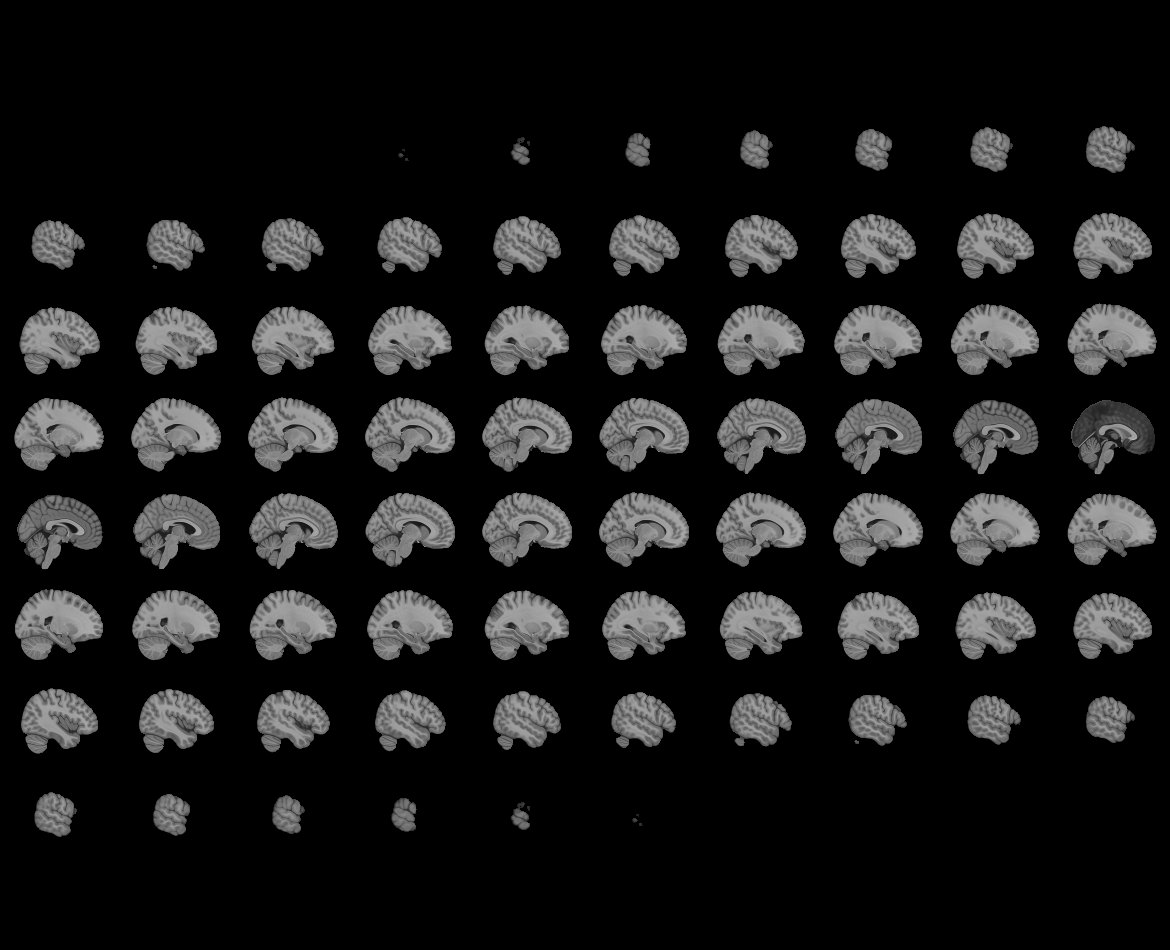
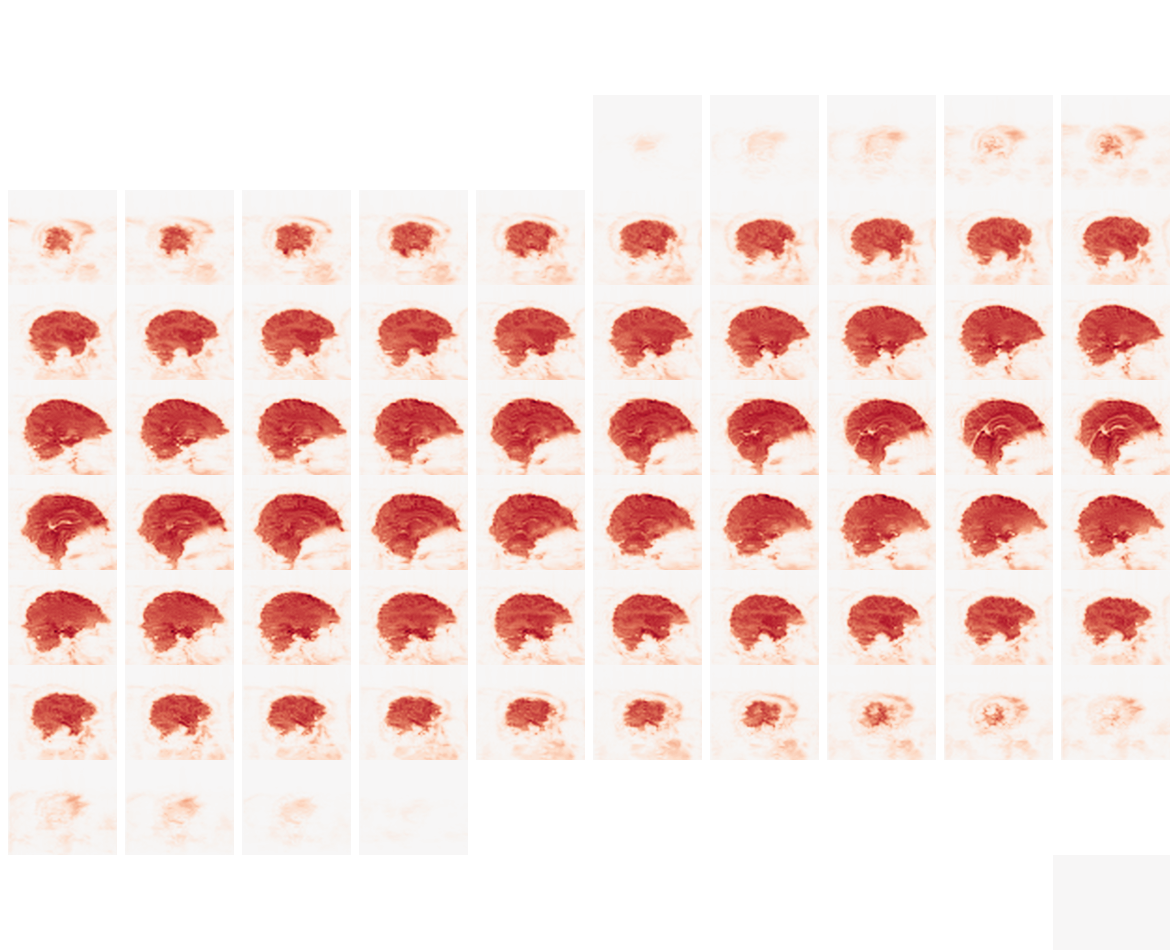

In [6]:
from nilearn import plotting
from nilearn.image import mean_img
import warnings
warnings.filterwarnings('ignore')

# Inspect volume dimensionlity (size of image)
print(f'Mean image dimensionality {mean_img(fmri_filename).shape}')

# Plot an fMRI volume
plotting.view_img(mean_img(fmri_filename), threshold=None)

### Visualizing the MRI volume

The Haxby dataset also contains anatomical MRI, through which we can visualise the different brain structures.


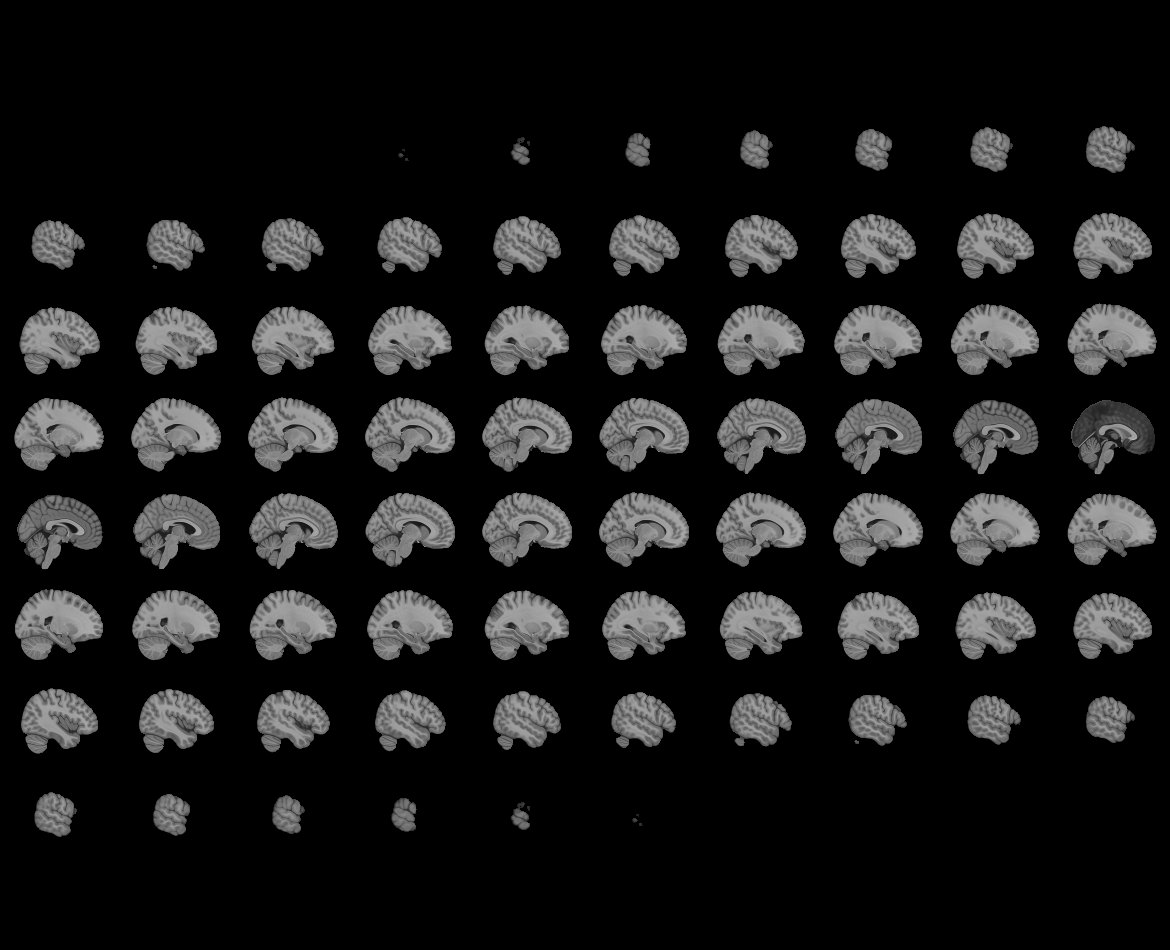
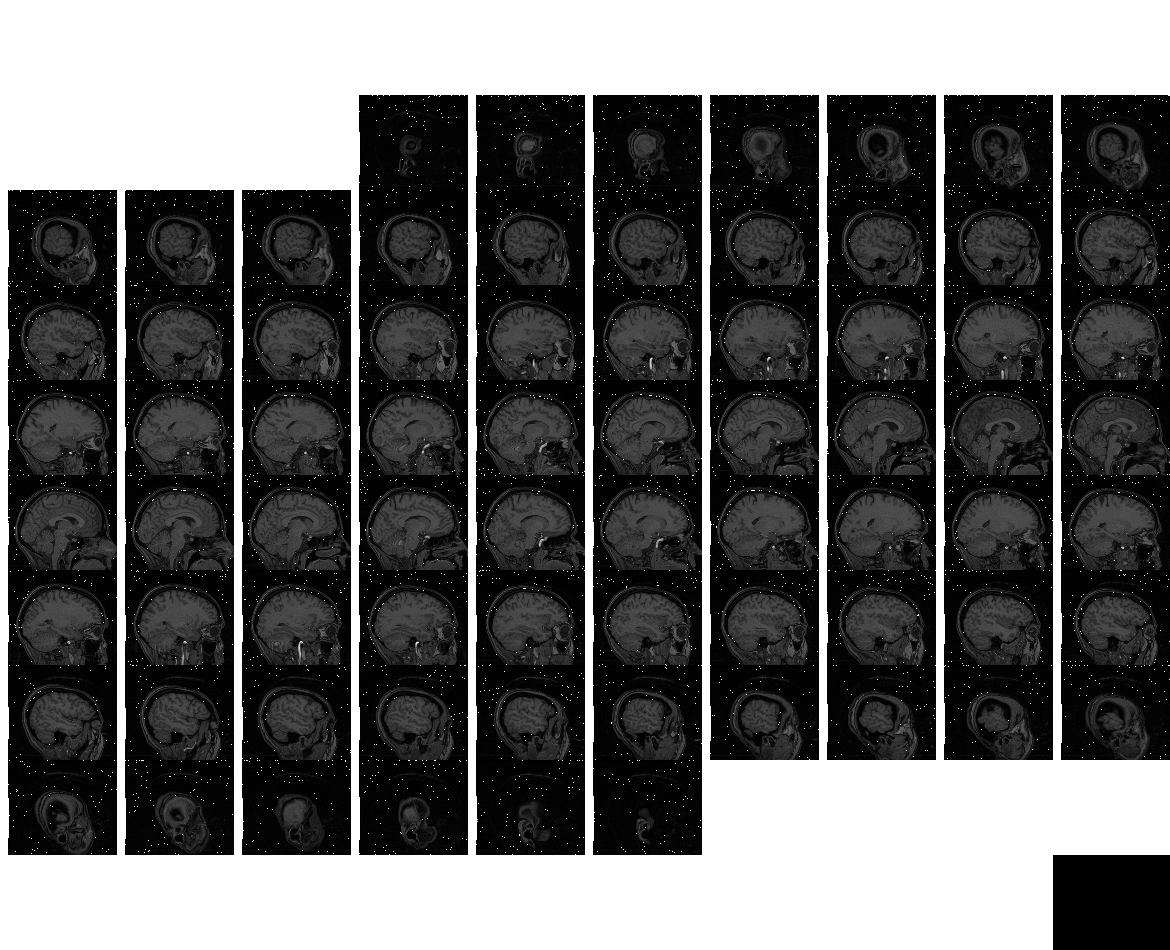

In [7]:
# Anatomical MRI file
anat_filename = haxby_dataset.anat[0]

# Visualize the anatomical image
plotting.view_img(anat_filename, symmetric_cmap=False, cmap='Greys_r', colorbar=False)

### Applying a **brain** mask to get data of interest (visual processing area of the brain)

These are some really lovely images, but for machine learning we need matrices to work with the actual data. If we want to use sklearn we will need to transform the Nifti images into a **data matrix**. For the first model we will only use voxels within **Ventral Temporal (VT) cortex** which is a visual processing area. A mask of the VT coming from the Haxby study is available. We have to define a brain mask filename.

**Why not use the whole brain?** We apply a mask because whole-brain fMRI is huge, and most voxels are either irrelevant to the task or add noise. Masking is a way to select a subset of voxels (features) so the machine learning problem becomes more tractable and interpretable. In this case, we select voxels that we expect to contain strong visual category information, i.e., the VT.

C:\Users\adria\nilearn_data\haxby2001\subj2\mask4_vt.nii.gz


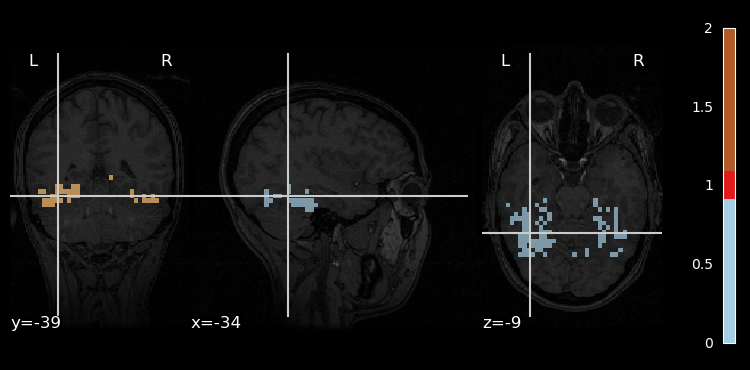

In [8]:
mask_filename = haxby_dataset.mask_vt[0]

# Let's visualize it, using the subject's anatomical image as a
# background
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0], cmap="Paired")

print(mask_filename)

### Loading the **labels**

Now we can load the labels that are stored in a CSV file, separated by spaces.

We use pandas to load them in an array.


The task was a visual-recognition task, and the labels denote the experimental condition (the type of object presented to the subject). **Each label tells us what category the subject was viewing** at that moment (e.g. faces, houses, cats, etc.). **This is what we are going to try to predict from the fMRI data.**

In [9]:
# Load behavioral information
behavioral = pd.read_csv(haxby_dataset.session_target[0], delimiter=" ")

# Enable viewing of all rows of pandas dataframe
pd.set_option('display.max_rows', None)
print(behavioral)

            labels  chunks
0             rest       0
1             rest       0
2             rest       0
3             rest       0
4             rest       0
5             rest       0
6         scissors       0
7         scissors       0
8         scissors       0
9         scissors       0
10        scissors       0
11        scissors       0
12        scissors       0
13        scissors       0
14        scissors       0
15            rest       0
16            rest       0
17            rest       0
18            rest       0
19            rest       0
20            rest       0
21            face       0
22            face       0
23            face       0
24            face       0
25            face       0
26            face       0
27            face       0
28            face       0
29            face       0
30            rest       0
31            rest       0
32            rest       0
33            rest       0
34            rest       0
35             cat       0
3

As we can see from the targets above, the experiment contains many conditions. As a consequence, the dataset is quite large. Not all of this data is of interest to us for decoding, so **we will keep only fMRI data corresponding to faces or houses**. We create a **temporal mask** of the samples belonging to these two conditions; this mask is then applied to the fMRI data to restrict the classification to the face vs house discrimination.

**Note:** Previously, we applied a **spatial mask** to keep only the VT cortex in the fMRI scans. Since it's a spatial mask, it is applied across the first 3 dimensions of the fMRI data, i.e. (x, y, z). The fourth dimension (t) is left untouched. This time, we apply a **temporal mask** to keep only the timepoints where the subject was shown houses and faces. Thus, to select the corresponding fMRI data, we apply a temporal mask on the time dimension (t). Here, (x, y, z) are left untouched.

The **input data will become much smaller** (i.e. we will have fewer samples/timepoints).

> How many time points correspond to our stimuli of interest?

In [10]:
from nilearn.image import index_img, smooth_img
import numpy as np

condition_mask = behavioral["labels"].isin(["face", "house"])
# The data is in one single large 4D image
fmri_niimgs = index_img(fmri_filename, condition_mask)

# Reading mask Nifti from filename path
fmri_niimgs_mask = smooth_img(mask_filename, None)


# Checking dimensionality of data
print(f'4D data dimensionality (3 spatial dimensions + time) {fmri_niimgs.shape}')
print(f'mask dimensionality {fmri_niimgs_mask.shape}')


4D data dimensionality (3 spatial dimensions + time) (40, 64, 64, 216)
mask dimensionality (40, 64, 64)


**Viewing the stimuli images**

Now that we have selected a sample of labels (stimuli), we can visualise them.

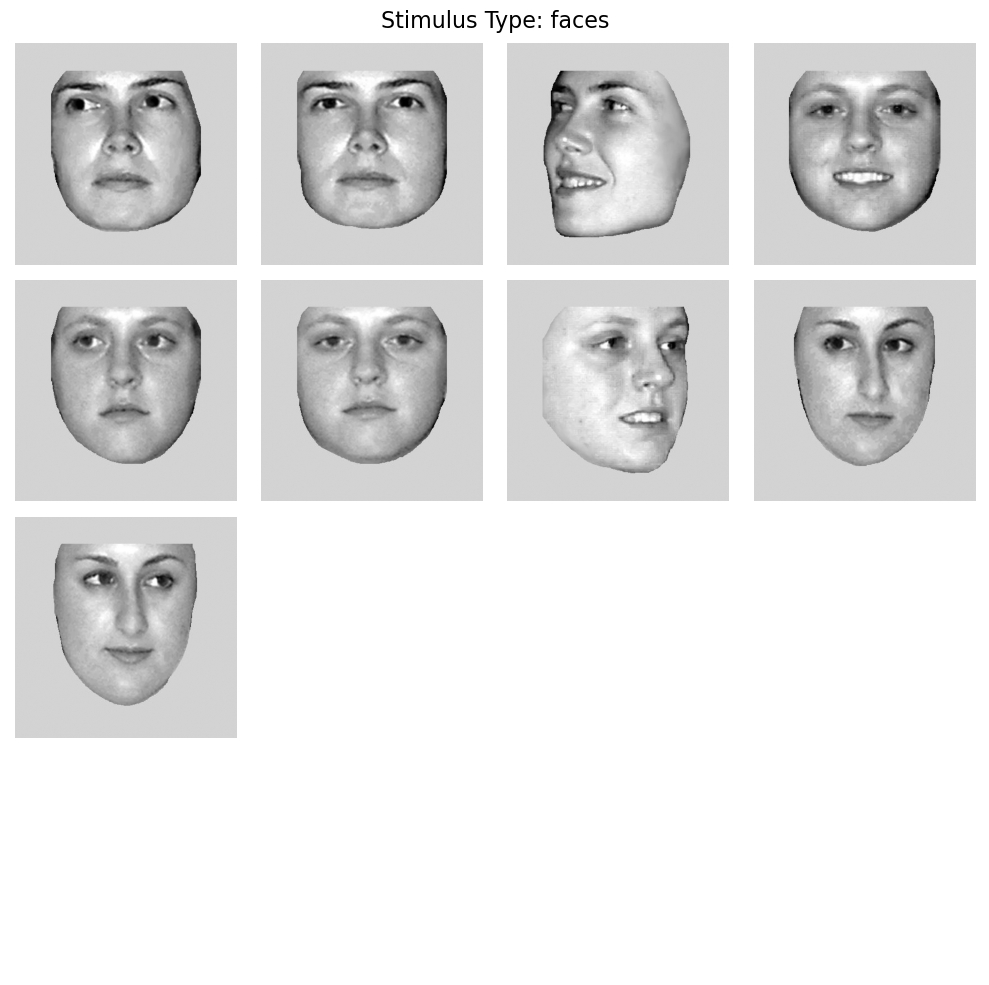

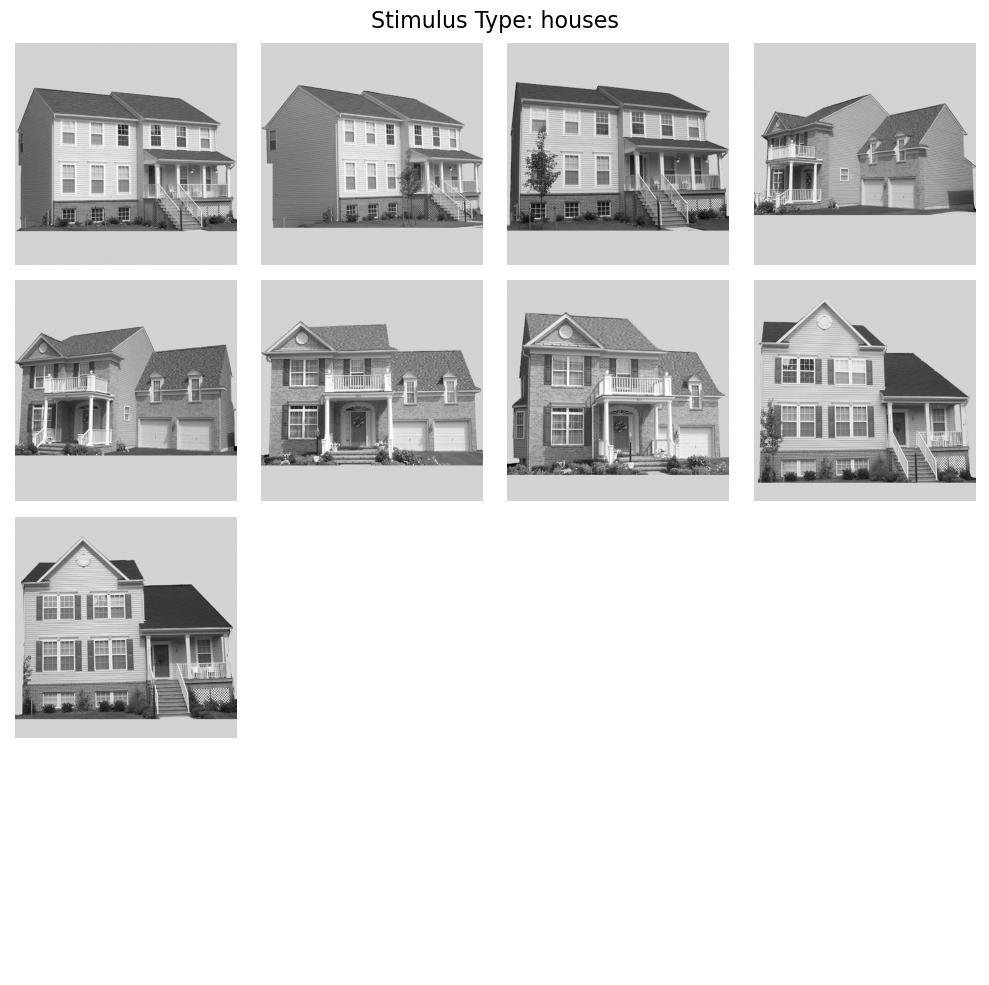

In [11]:
from nilearn.plotting import show

# Stimulus information from the Haxby dataset
stimulus_information = haxby_dataset.stimuli

# Filter the behavioral data using the same condition mask
filtered_behavioral = behavioral[condition_mask]

# Visualize stimuli corresponding to the filtered conditions
for stim_type in ["faces", "houses"]:  # Focus only on "face" and "house"
    file_names = stimulus_information[stim_type]

    # Align stimuli with the filtered behavioral data indices
    filtered_file_names = [
        file_names[i] for i in filtered_behavioral.index if i < len(file_names)
    ]

    # Display up to 16 stimuli images for the current type
    filtered_file_names = filtered_file_names[:16]
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.suptitle(f"Stimulus Type: {stim_type}", fontsize=16)

    for img_path, ax in zip(filtered_file_names, axes.ravel()):
        # Read and display the image
        img = plt.imread(img_path)
        ax.imshow(img, cmap=plt.cm.gray)

    # Turn off axes for all subplots
    for ax in axes.ravel():
        ax.axis("off")

    plt.tight_layout()
    plt.show()

show()

**Stimuli vs time plot**
<br>Visualise the distribution of the two stimuli of interest during the experiment. Each point represents a particular label (face or house) that was shown at a particular time during the experiment. For each stimuli, an fMRI scan was acquired.




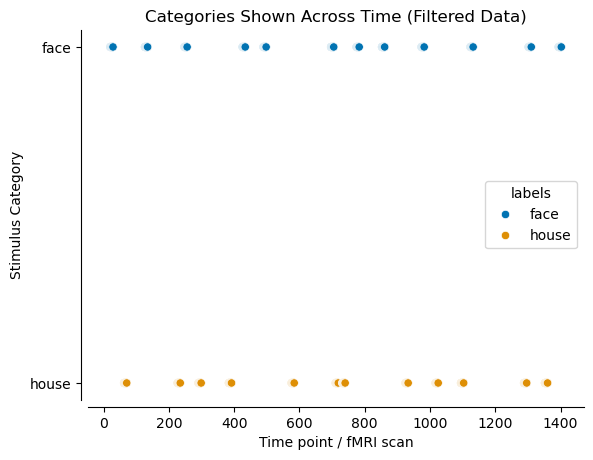

In [12]:
# Use the filtered behavioral data
filtered_behavioral = behavioral[condition_mask]

# Create the scatter plot
ax = sns.scatterplot(
    x=filtered_behavioral.index,  # Time points (indices)
    y=filtered_behavioral["labels"],  # Labels ("face", "house")
    hue=filtered_behavioral["labels"],  # Color by label
    legend="full",  # Show legend for labels
    palette="colorblind"  # Use a colorblind-friendly palette
)

# Customize the plot
plt.title("Categories Shown Across Time (Filtered Data)")
ax.set_xlabel("Time point / fMRI scan")
ax.set_ylabel("Stimulus Category")
sns.despine(offset=5)  # Remove spines for a clean look

plt.show()

### Converting the images into a data matrix and applying the spatial (brain) mask

Reshape the data to prepare for a machine learning model i.e., get a data matrix in a 2D format: **features x samples**.


> Which dimension was flattened (spatial or temporal)? <br>


> What do the new dimensions correspond to?

In [13]:
# Convert the NIfTI image to a numpy array
data = fmri_niimgs.get_fdata()

# Reshape the data
# -1 will automatically calculate the size of the first dimension
reshaped_data = data.reshape(-1, data.shape[-1])

print(reshaped_data.shape)

(163840, 216)


Reshape the brain mask to match the new data shape

In [14]:
data_mask = fmri_niimgs_mask.get_fdata()
reshaped_mask = data_mask.reshape(-1)

print(reshaped_mask.shape)

(163840,)


**Count non-zero elements in the mask**
<br>We use a brain mask to include only the part of the brain responsible for visual processing.

> How many data points does this leave us with in each fMRI scan, and how does this affect the number of features we will use in our model?

In [15]:
print(reshaped_mask.sum())

464.0


**Sanity check**
<br>Try reshaping the reshaped data and mask to the original shape

In [16]:
# reshaping to original

original_data_shape = (40, 64, 64, 216)  # Replace with the actual original shape
original_mask_shape = (40, 64, 64)

# Reshape data back to the original shape
data_original_shape = reshaped_data.reshape(original_data_shape)

# Reshape mask back to the original shape
mask_original_shape = reshaped_mask.reshape(original_mask_shape)

Check if the un-reshaped data and mask match the original

In [17]:
# check if original and un-reshape reshaped match
print(np.array_equal(data, data_original_shape))

# check if original and un-reshape reshaped match
print(np.array_equal(data_mask, mask_original_shape))

True
True


**Filter the data**
<br>Now that we have reshaped the data and brain mask, and checked them, we can apply the mask to our data to only include our brain region of interest (VT cortex).
<br>We do this by keeping only the data elements that correspond to non-zero values in the brain mask.
<br>We also create a matrix containing the position of the non-zero elements from the brain mask to keep track of the location of our brain regions of interest.

> What do you expect the resulting data shape to be?

In [18]:
# Apply the mask to the data
filtered_data = reshaped_data[reshaped_mask != 0]

# To get the index positions of the non-zero elements in the mask
# np.nonzero returns a tuple - take the first element
nonzero_indices = np.nonzero(reshaped_mask)[0]

# Now, 'filtered_data' contains only the rows with non-zero mask elements
# and 'nonzero_indices' contains the indices of these non-zero elements

# If you need an index matrix with the same shape as the filtered_matrix
# where each row is filled with the corresponding index from nonzero_indices
index_matrix = np.tile(nonzero_indices[:, np.newaxis], (1, filtered_data.shape[1]))

print(filtered_data.shape)
print(nonzero_indices)

(464, 216)
[ 21598  21726  25630  25694  25756  25822  25886  25948  26015  29788
  29790  29852  29854  29915  29980  29981  30044  30045  30107  30110
  30111  30174  30238  33885  33886  33947  33950  33951  34012  34076
  34077  34078  34140  34204  34206  34207  34267  34268  34270  37915
  37916  37917  37918  37980  37982  37983  38046  38047  38108  38172
  38173  38236  38237  38300  38301  38363  38364  38365  38427  38429
  38493  38557  42012  42013  42014  42015  42076  42078  42140  42204
  42396  42460  42524  42587  42588  42651  42652  46107  46300  46364
  46428  46492  46493  46556  46559  46620  46622  46684  46749  50203
  50268  50332  50397  50398  50461  50525  50526  50592  50653  50654
  50655  50716  50718  50846  50907  50908  50972  54299  54300  54366
  54429  54493  54557  54558  54685  54749  54750  54751  54813  54814
  54815  54940  54941  58396  58398  58399  58591  58655  58846  58847
  58909  58910  58911  59100  59101  59102  59165  59166  62492  6

We apply the same **temporal mask** that we applied to the fMRI data earlier to the targets (i.e., get only targets corresponding to "house" or "face").
<br>This is not the brain mask, but the `condition_mask` used to select our desired labels.

In [19]:
conditions = behavioral["labels"][condition_mask]
# Convert to numpy array
conditions = conditions.values
print(conditions.shape)
print(conditions)

(216,)
['face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'house'
 'house' 'house' 'house' 'house' 'house' 'house' 'house' 'house' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'house' 'house'
 'house' 'house' 'house' 'house' 'house' 'house' 'house' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'house' 'house' 'house'
 'house' 'house' 'house' 'house' 'house' 'house' 'house' 'house' 'house'
 'house' 'house' 'house' 'house' 'house' 'house' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'house' 'house' 'house' 'house'
 'house' 'house' 'house' 'house' 'house' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'house' 'house' 'house' 'house'
 'house' 'house' 'house' 'house' 'house' 'house' 'house' 'house' 'house'
 'house' 'house' 'house' 'house' 'house' 'face' 'face' 'face' 'face'
 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face' 'face'

**Encode the labels**
<br>Right now, the labels are in string format i.e., 'houses', 'faces'. To make them suitable for a ML task, we need to convert them to numerical values.
<br>**Task:** create a vector of binary labels (`y`).  

In [20]:
# add code to convert conditions to binary labels y

# Example: convert 'face' to 1 and 'house' to 0
y = (conditions == 'face').astype(int)

Check your data shape.

In [21]:
print(filtered_data.shape)
print(y.shape)

(464, 216)
(216,)


# 🧑‍💻 TASK 1: Train an SVM to decode the labels from the fMRI data


## 1.1 Split the `filtered_data` into train and test (leaving the last 36 examples for test)

Because fMRI timepoints are **not independent** (closeby samples are highly correlated, and the experiment is block-based), we should not randomly shuffle the data before splitting. Instead, we use a time-based split: we keep the last 36 examples as a held-out test set, and use the remaining examples for training. This reduces data leakage from temporally close samples.

**Why 36?** One block is 9 fMRI volumes (timepoints) so we keep 3-4 (here 4) blocks for testing. But you can change this number if you like, just be mindful of data leakage.

Create train and test sets for the classification model.

> How is the balance between features (p) and samples (N)?

In [27]:
# The number of features is the first dimension of filtered_data, and the number of samples is the second dimension
num_samples = filtered_data.shape[1]

test_size = 36   # Reserve the last 36 samples for testing

# Calculate the index where the test set starts
split_index = num_samples - test_size

# Split the data along the second dimension (time)
X_train = filtered_data[:, :split_index]
X_test  = filtered_data[:, split_index:]

y_train = y[:split_index]
y_test  = y[split_index:]

# Transpose X_train and X_test so that each row represents a sample
X_train = X_train.T
X_test  = X_test.T

# Confirm the dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (180, 464)
y_train shape: (180,)
X_test shape: (36, 464)
y_test shape: (36,)


## 1.2 Do a **cross-validation** on the training set to optimize the SVM hyper-parameters and after apply the SVM model with the optimal hyper-parameter to the test data. Print the mean and the standard deviation of the CV score, the best hyperparameter and the test score

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

param_grid = {
    'C': [0.1, 1, 10],  # Example values
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object with an SVM classifier
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Time the grid search
start_time = time.time()

# Perform grid search
grid.fit(X_train, y_train)

# Measure and print the time taken
time_taken = time.time() - start_time
print("Time taken for GridSearchCV with regular kernels: {:.2f} seconds".format(time_taken))


# Print the results
print("Mean CV Score: ", grid.cv_results_['mean_test_score'][grid.best_index_])
print("Std Dev of CV Score: ", grid.cv_results_['std_test_score'][grid.best_index_])
print("Best Hyperparameters: ", grid.best_params_)

# Evaluate on the test set
y_pred = grid.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print("Test Score: ", test_score)


# Predict on the test set
y_pred = grid.predict(X_test)

# Print predictions
print("Predictions on the test set:", y_pred)

# Calculate and print the accuracy score
test_accuracy = accuracy_score(y_test, y_pred)
print("Final Test Accuracy:", test_accuracy)

Time taken for GridSearchCV with regular kernels: 0.31 seconds
Mean CV Score:  0.9444444444444444
Std Dev of CV Score:  0.08425417160057277
Best Hyperparameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Score:  1.0
Predictions on the test set: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Final Test Accuracy: 1.0


## 1.3 Inspect the SVM weights

Let's inspect and display the SVC model' weights by turning them into a nifti image.

First we want to retrieve the SVM weights.

In [33]:
# add the code here to show the coefficients

# Make sure your best model is using a linear kernel
print("kernel:", grid.best_params_['kernel'])

# If the kernel is linear, retrieve the weights
if grid.best_params_['kernel'] == 'linear':
    # The best estimator in your grid search
    best_svm = grid.best_estimator_

    # Retrieve the SVM weights (coefficients)
    svm_weights = best_svm.coef_

    # Print the weights
    print("SVM Weights:", svm_weights)
else:
    print("SVM weights are not interpretable for non-linear kernels.")


kernel: linear
SVM Weights: [[-8.25841182e-04 -2.11446325e-04 -1.45740928e-03 -4.74872802e-05
  -4.88864587e-04  9.37593425e-04  1.09061136e-03 -8.46481421e-04
   3.81114388e-04 -1.13454056e-03 -1.83626820e-04 -1.55379575e-06
   4.21326355e-04 -7.52766247e-04  1.13948084e-03  3.65935453e-04
   1.96295656e-03  5.33513376e-04 -4.58419140e-04 -7.85083264e-06
  -1.75992526e-04 -6.31997802e-04  2.67308132e-04 -8.31942730e-05
  -9.75233337e-04 -6.80143197e-04 -1.95414902e-04  5.30538400e-04
   1.13447715e-03  1.63365300e-03  1.32849603e-03 -5.29378839e-05
   1.62918758e-03  1.41617476e-03 -2.35302733e-04 -5.06943948e-04
   1.65603293e-04 -9.03044672e-05 -5.99036771e-04 -1.35694412e-03
  -1.94979702e-04  4.10166176e-04  7.94513074e-04 -2.20159846e-04
   5.80691397e-04  3.67770097e-04  1.93220057e-04  5.90346166e-04
   8.77571135e-04  7.87823739e-04  1.70522384e-03  1.56538270e-03
   1.24092243e-03  7.92494764e-04  1.84857993e-03 -7.01513232e-04
   1.85744776e-04  1.78642989e-03  1.74036891e-0

It’s an array with only one coefficient per voxel (data point).

In [34]:
# add code to print the coef. shape
print("Shape of SVM Coefficients:", svm_weights.shape)

Shape of SVM Coefficients: (1, 464)


To get the Nifti image of these coefficients we need to convert the coef. to 3D and create a Nifti image

In [35]:
print(type(data_mask))

<class 'numpy.ndarray'>


In [36]:
# add code here

from nilearn.image import new_img_like

# Initialize a 3D array with zeros
# Assume original_shape is the shape of the original 3D brain image
coef_3d = coef_3d = np.zeros(fmri_niimgs_mask.shape)

# Map the coefficients back to their original voxel locations
coef_3d.flat[nonzero_indices] = svm_weights

print(coef_3d.shape)


# Create a Nifti image
coef_img = new_img_like(fmri_niimgs_mask, coef_3d)

# coef_img is now a Nifti image of the SVM coefficients

(40, 64, 64)


## 1.4 Plotting the SVM weights
We can plot the weights, using the subject’s anatomical MRI as a background.

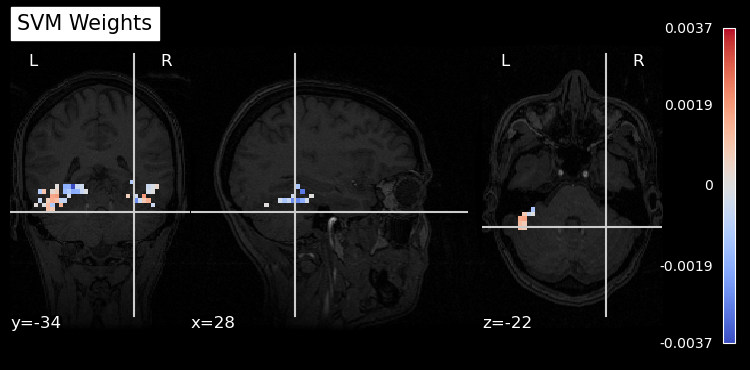

In [37]:
from nilearn import plotting

# Assuming coef_img is the Nifti image containing your SVM weights
# and haxby_dataset.anat[0] is the path to the anatomical image

# Plot the SVM weights
plotting.plot_stat_map(coef_img, bg_img=haxby_dataset.anat[0],
                       display_mode='ortho',
                       title='SVM Weights',
                       cut_coords=(28, -34, -22),
                       cmap='coolwarm')

# Show the plot
plotting.show()

# 👩‍💻 TASK 2: Train an SVM with pre-computed kernel for computational efficiency

For the second task we will use the **whole brain** voxels as features. We will start by creating a whole brain mask to include all voxels within the brain.





Mask dimensionality (40, 64, 64)


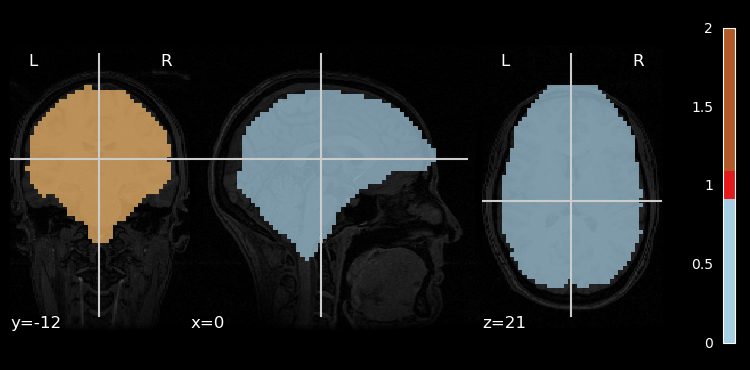

In [38]:
from nilearn.maskers import NiftiMasker
from nilearn.plotting import plot_epi, plot_roi, show

masker = NiftiMasker(mask_strategy="epi")
masker.fit(fmri_filename)

whole_brain_mask = masker.mask_img_

# Let's visualize the whole brain mask, using the subject's anatomical image as a
# background
plotting.plot_roi(whole_brain_mask, bg_img=haxby_dataset.anat[0], cmap="Paired")

# Checking dimensionality of the mask
print(f'Mask dimensionality {whole_brain_mask.shape}')

Reshape whole brain mask


In [49]:
# Convert the NIfTI image to a numpy array
wb_mask = whole_brain_mask.get_fdata()
reshaped_wb_mask = wb_mask.reshape(-1)

# Reshape the data
print(reshaped_wb_mask.shape)

# print(reshaped_whole_brain_mask.shape)

(163840,)


**Size of whole brain mask**

Count non-zero elements in the new mask, which corresponds to the number of voxels within the whole brain mask

> How many data points are in the mask now? Compare this to the size of the VT mask used before.

In [50]:
print(reshaped_wb_mask.sum())

24083.0


Now, filter the data using the mask to keep only the brain.

In [51]:
# Apply the whole mask to the data
filtered_wb_data = reshaped_data[reshaped_wb_mask != 0]

# To get the index positions of the non-zero elements in the mask
# np.nonzero returns a tuple - take the first element
nonzero_wb_indices = np.nonzero(reshaped_wb_mask)[0]
# Now, 'filtered_data' contains only the rows with non-zero mask elements
# and 'nonzero_indices' contains the indices of these non-zero elements

# If you need an index matrix with the same shape as the filtered_matrix
# where each row is filled with the corresponding index from nonzero_indices
index_wb_matrix = np.tile(nonzero_indices[:, np.newaxis], (1, filtered_wb_data.shape[1]))

print(filtered_wb_data.shape)

(24083, 216)


Now we can create a data matrix using the whole brain mask and compute linear kernel from the data matrix $K = X'X$, and will repeat task 1 training the SVM using the option of a **pre-computed kernel**.

https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py

## 2.1 Set up test/train split like in task 1

> How do the number of features (p) compare to the sample size (N) here?

In [52]:
# The number of features is the first dimension of filtered_data, and the number of samples is the second dimension
num_samples = filtered_wb_data.shape[1]

test_size = 36   # Reserve the last 36 samples for testing

# Calculate the index where the test set starts
split_index = num_samples - test_size

# Split the data along the second dimension (time)
X_train = filtered_wb_data[:, :split_index]
X_test  = filtered_wb_data[:, split_index:]

y_train = y[:split_index]
y_test  = y[split_index:]

# Transpose X_train and X_test so that each row represents a sample
X_train = X_train.T
X_test  = X_test.T

# Confirm the dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (180, 24083)
y_train shape: (180,)
X_test shape: (36, 24083)


Apply a **linear kernel** to your data.

> What is the resulting data dimensionality after the kernel trick?

> How does it compare to the original data?

In [54]:
def linear_kernel(X,Y):
    print(X.shape,Y.shape)
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(X, Y.T)

X_train_kernel = linear_kernel(X_train, X_train)
X_test_kernel = linear_kernel(X_test, X_train)

# Check the kernel and the data dimensionality
print("X_train_kernel shape:", X_train_kernel.shape)
print("X_train shape:", X_train.shape)
print("X_test_kernel shape:", X_test_kernel.shape)
print("X_test shape:", X_test.shape)

(180, 24083) (180, 24083)
(36, 24083) (180, 24083)
X_train_kernel shape: (180, 180)
X_train shape: (180, 24083)
X_test_kernel shape: (36, 180)
X_test shape: (36, 24083)


## 2.3 Train SVM with precomputed Kernel on the entire original dataset ie `reshaped_data` rather than the masked reduced features dataset ie `filtered_data`


🤔 What can we learn from the time differences of GridSearchCV using regular Kernels (task 1) vs a precomputed Kernel (task 2)?

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Define the parameter grid for hyperparameter tuning
param_grid_precomputed = {
    'C': [0.1, 1, 10, 100],  # Example values
    #    'gamma': [1, 0.1, 0.01, 0.001], # Do we need gamma? No since it's hyperparameter for certain kernel function like RBF
     'kernel': ['precomputed']
}

# Create a GridSearchCV object for the precomputed kernel
grid_precomputed = GridSearchCV(SVC(), param_grid_precomputed, refit=True, verbose=2, cv=5)

# Time the grid search for the precomputed kernel
start_time_precomputed = time.time()

# Perform grid search
grid_precomputed.fit(X_train_kernel, y_train)

# Measure and print the time taken
time_taken_precomputed = time.time() - start_time_precomputed
print("Time taken for GridSearchCV with precomputed kernel: {:.2f} seconds".format(time_taken_precomputed))


# Print the results
print("Mean CV Score: ", grid_precomputed.cv_results_['mean_test_score'][grid.best_index_])
print("Std Dev of CV Score: ", grid_precomputed.cv_results_['std_test_score'][grid.best_index_])
print("Best Hyperparameters: ", grid_precomputed.best_params_)

# Evaluate on the test set

y_pred = grid_precomputed.predict(X_test_kernel)
test_score = accuracy_score(y_test, y_pred)
print("Test Score: ", test_score)




Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ...........................C=10, kernel=precomputed; total time=   0.0s
[CV] END ...........................C=10, kernel=

# Mapping the dual weights back to the primal

In order to visualize the weights in the input space we need to **map the SVM dual coefficients back to the primal weights**.

In [57]:
# Add code here
best_svm = grid_precomputed.best_estimator_

# Retrieve the SVM weights (coefficients)
support_index = best_svm.support_
svm_alpha = best_svm.dual_coef_

Compute the primal weights from the dual coefficients: a weighted sum of the support vectors.

In [58]:
precomputed_svm_weight = np.zeros(X_train.shape[1])
for i in range(len(support_index)):
    precomputed_svm_weight += X_train[support_index[i]]*svm_alpha[0][i]

Check the size of the resulting weights.

> What weight vector size do you expect?

In [59]:
precomputed_svm_weight.shape

(24083,)

Once we have the primal weights we can now create a nifti image using the same procedure as before

In [61]:
# Add code here

from nilearn.image import new_img_like

# Initialize a 3D array with zeros
# Assume original_shape is the shape of the original 3D brain image
coef_3d = coef_3d = np.zeros(fmri_niimgs_mask.shape)

# Map the coefficients back to their original voxel locations
coef_3d.flat[nonzero_wb_indices] = precomputed_svm_weight

print(coef_3d.shape)


# Create a Nifti image
coef_img = new_img_like(fmri_niimgs_mask, coef_3d)

# coef_img is now a Nifti image of the SVM coefficients

(40, 64, 64)


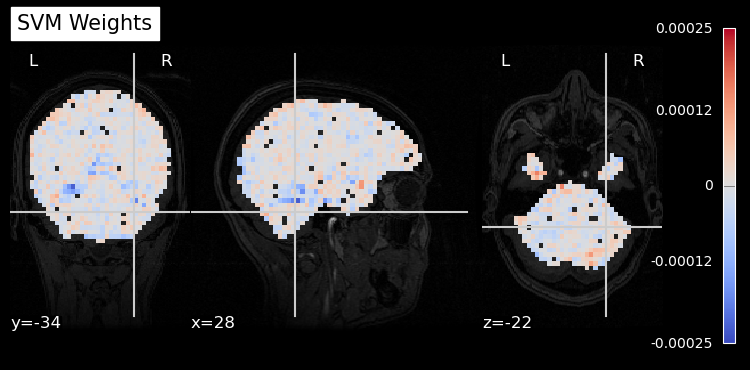

In [62]:
# add code here
from nilearn import plotting

# Assuming coef_img is the Nifti image containing your SVM weights
# and haxby_dataset.anat[0] is the path to the anatomical image

# Plot the SVM weights
plotting.plot_stat_map(coef_img, bg_img=haxby_dataset.anat[0],
                       display_mode='ortho',
                       title='SVM Weights',
                       cut_coords=(28, -34, -22),
                       cmap='coolwarm')

# Show the plot
plotting.show()
